In [252]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [253]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [254]:
df_domclick = pd.read_csv("domclick/Омск_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2976 non-null   int64  
 1   region                         2976 non-null   object 
 2   address                        2976 non-null   object 
 3   latitude                       2976 non-null   float64
 4   longitude                      2976 non-null   float64
 5   price                          2976 non-null   int64  
 6   house_floors                   2976 non-null   int64  
 7   house_buildYear                2976 non-null   object 
 8   house_ceilingHeight            2976 non-null   object 
 9   house_hasGarbageDisposer       2013 non-null   object 
 10  house_liftsFreight             1215 non-null   float64
 11  house_liftsPassenger           1667 non-null   float64
 12  house_wallType                 2897 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1912541688,Омск,"10-я Чередовая улица, 9",54.92257,73.41527,3400000,10,2015,undefined,NaN,NaN,NaN,Панельный,2992.8,0,9894.3,1479,NaN,Центральное,1,Центральное,4,B+,4,Пожарный кран,Железобетонный,Свайный,Центральное,100,0,Центральное,Вытяжная,undefined,0,33.10000,5.00000,24.20000,4,undefined,undefined,0,NaN,undefined,NaN
1,1914078292,Омск,"улица Энергетиков, 61",55.04249,73.27913,1480000,5,1967,2.5,False,0.00000,NaN,Кирпичный,493,477.3,2950,693,NaN,Центральное,0,Центральное,NaN,Не присвоен,2,NaN,Железобетонный,Свайный,Центральное,0,0,Центральное,Вытяжная,Альтернатива,1,18.80000,0.00000,16.00000,4,1,0,0,False,Косметический,NaN
2,1709383199,Омск,"улица Бархатовой, 5",55.04582,73.32618,6400000,10,2012,undefined,True,NaN,1.00000,Железобетон,65.2,0,9927.7,NaN,5,Центральное,1,Центральное,5,C,5,NaN,Железобетонный,NaN,Центральное,NaN,NaN,Центральное,NaN,Свободная продажа,3,65.20000,13.40000,38.50000,8,undefined,1,0,NaN,Хороший,NaN
3,1905256644,Омск,"улица Рокоссовского, 14",54.99817,73.25956,3250000,9,1986,undefined,True,NaN,1.00000,Панельный,1245.7,0,6432.7,844.1,2,Центральное,1,Центральное,2,Не присвоен,2,NaN,Железобетонный,Иной,Центральное,0,0,Центральное,Приточно-вытяжная,Свободная продажа,1,32.40000,6.60000,16.90000,8,1,undefined,0,True,Хороший,NaN
4,1698026646,Омск,"1-я Самарская улица, 1",54.91682,73.31458,2800000,2,1965,undefined,False,NaN,0.00000,Кирпичный,42.6,NaN,639.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,Деревянный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,42.60000,6.00000,25.30000,1,1,undefined,0,True,Хороший,NaN


In [255]:
df_cian = pd.read_csv("cian/data_home_Omsk.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7454 entries, 0 to 7453
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 7454 non-null   object 
 1   price                7454 non-null   int64  
 2   price_for_metr       7454 non-null   int64  
 3   floor_object         7454 non-null   int64  
 4   total_floors         7454 non-null   int64  
 5   type_of_home         7454 non-null   object 
 6   square_home          7454 non-null   float64
 7   live_square          7454 non-null   object 
 8   kitchen_square       7454 non-null   object 
 9   height_ceiling       7454 non-null   object 
 10  bathroom             7454 non-null   object 
 11  balcony              7454 non-null   object 
 12  repair               7454 non-null   object 
 13  yer_home             7454 non-null   object 
 14  garbage_chute        7454 non-null   object 
 15  type_home            7454 non-null   o

In [256]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,1/2 квартиры,1300000,24528,5,5,Вторичка,53.00000,Null,Null,Null,Null,Null,Косметический,1981,Null,Кирпичный,Железобетонные,6,Центральное,Нет,Центральное,Null,Null,"Омская область, Омск, Центральный, ул. Циолков...",https://omsk.cian.ru/sale/flat/293968261/
1,1-комн. квартира,1100000,62147,1,5,Вторичка,17.70000,Null,Null,2.5,Null,Null,Косметический,1992,Null,Панельный,Железобетонные,2,Центральное,Нет,Null,Null,Null,"Омская область, Омск, Центральный, ул. 2-я Учх...",https://omsk.cian.ru/sale/flat/293350190/
2,1/2 квартиры,1200000,26374,2,5,Вторичка,45.50000,Null,Null,Null,1,Null,Косметический,1960,Null,Панельный,Железобетонные,6,Центральное,Нет,Null,Null,Null,"Омская область, Омск, Советский, мкр. Город Не...",https://omsk.cian.ru/sale/flat/292487361/
3,2-комн. квартира,1200000,25105,1,2,Вторичка,47.80000,32.0,9.0,Null,1,1,Без ремонта,1984,Null,Null,Нет информации,Null,Нет информации,Нет,Null,Null,Null,"Омская область, Омск, Кировский, Входной микро...",https://omsk.cian.ru/sale/flat/291980994/
4,1-комн. квартира,1300000,50000,1,2,Вторичка,26.00000,15.0,5.0,Null,Null,Null,Косметический,Null,Нет,Деревянный,Null,Null,Null,Null,Null,Null,Null,"Омская область, Омск, Кировский, мкр. Старый К...",https://omsk.cian.ru/sale/flat/291568887/


# Подготовка данных

In [257]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [258]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2976 non-null   int64  
 1   region                         2976 non-null   object 
 2   address                        2976 non-null   object 
 3   latitude                       2976 non-null   float64
 4   longitude                      2976 non-null   float64
 5   price                          2976 non-null   int64  
 6   house_floors                   2976 non-null   int64  
 7   house_buildYear                2952 non-null   object 
 8   house_ceilingHeight            1364 non-null   object 
 9   house_hasGarbageDisposer       2013 non-null   object 
 10  house_liftsFreight             1215 non-null   float64
 11  house_liftsPassenger           1667 non-null   float64
 12  house_wallType                 2892 non-null   o

In [259]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5969 entries, 0 to 7453
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 5969 non-null   object 
 1   price                5969 non-null   int64  
 2   price_for_metr       5969 non-null   int64  
 3   floor_object         5969 non-null   int64  
 4   total_floors         5969 non-null   int64  
 5   type_of_home         5969 non-null   object 
 6   square_home          5969 non-null   float64
 7   live_square          4356 non-null   object 
 8   kitchen_square       4525 non-null   object 
 9   height_ceiling       3962 non-null   object 
 10  bathroom             3276 non-null   object 
 11  balcony              4425 non-null   object 
 12  repair               3517 non-null   object 
 13  yer_home             5053 non-null   object 
 14  garbage_chute        984 non-null    object 
 15  type_home            4950 non-null   object

In [260]:
df_cian['name'].unique()

array(['1/2 квартиры', '1-комн. квартира', '2-комн. квартира', 'Студия',
       'Доля', '1/4 квартиры', '2-комн. апартаменты', '3-комн. квартира',
       '3/5 квартиры', '4/9 квартиры', '1-комн. апартаменты',
       '3/4 квартиры', '5-комн. квартира', '4-комн. квартира',
       'Квартира свободной планировки', 'Апартаменты-студия',
       '4-комн. апартаменты', '2/3 квартиры',
       'Апартаменты свободной планировки', '8/10 квартиры',
       '3-комн. апартаменты', '82/100 квартиры',
       'Многокомнатная квартира'], dtype=object)

In [261]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [262]:
df_cian['name'].unique()

array(['1-комн. квартира', '2-комн. квартира', 'Студия',
       '2-комн. апартаменты', '3-комн. квартира', '1-комн. апартаменты',
       '5-комн. квартира', '4-комн. квартира', 'Апартаменты-студия',
       '4-комн. апартаменты', '3-комн. апартаменты'], dtype=object)

In [263]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['1', '2', '0', '3', '5', '4'], dtype=object)

In [264]:
df_domclick['objectInfo_renovation'].unique()

array([nan, 'Косметический', 'Хороший', 'Без ремонта', 'косметический',
       'евроремонт', 'Дизайнерский', 'Евро', 'Ремонт', 'Евроремонт',
       'Требуется внутренняя отделка', 'Требует ремонта',
       'Требуется ремонт', 'Чистовая отделка', 'Косметический ремонт',
       'После ремонта', 'Дизайнерский ремонт', 'Евростандарт', 'под ключ',
       'высококачественная отделка', 'Отсутствует',
       'Ремонт от застройщика', 'Под чистовой ремонт',
       'Требуется косметический ремонт', 'Предчистовая отделка',
       'стандартный ремонт', 'Требуется капитальный ремонт',
       'предчистовая', 'под отделку', 'устаревший ремонт',
       'После косметического ремонта', 'полная',
       'Требуется легкий ремонт', 'Предчистовая'], dtype=object)

In [265]:
df_cian['repair'].unique()

array(['Косметический', 'Без ремонта', nan, 'Евроремонт', 'Дизайнерский'],
      dtype=object)

In [266]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [267]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

In [268]:
df_cian['repair'].unique()

array(['1', '0', nan, '2', '3'], dtype=object)

In [269]:
df_domclick['objectInfo_renovation'].unique()

array([nan, '1', '9', '0', '2', '3', '4', '5', '6', '7', '8'],
      dtype=object)

In [270]:
df_domclick['house_wallType'].unique()

array(['Панельный', 'Кирпичный', 'Железобетон',
       'Керамзитобетонная 1-слойная панель', 'Смешанные', 'Монолитный',
       'Керамзитобетон', 'Блочный', nan, 'Монолитно-кирпичный', 'Иные',
       'Деревянный', 'Кирпично-монолитный'], dtype=object)

In [271]:
df_cian['type_home'].unique()

array(['Панельный', nan, 'Деревянный', 'Кирпичный', 'Блочный',
       'Каркасный', 'Монолитный', 'Монолитно-кирпичный'], dtype=object)

In [272]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [273]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

In [274]:
df_domclick['house_wallType'].unique()

array(['0', '1', '7', '8', 'Смешанные', '3', '2', nan, '4', '5'],
      dtype=object)

In [275]:
df_cian['type_home'].unique()

array(['0', nan, '5', '1', '2', '6', '3', '4'], dtype=object)

In [276]:
df_cian['type_of_overlap'].unique()

array(['Железобетонные', nan, 'Смешанные', 'Деревянные'], dtype=object)

In [277]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', 'Деревянный', 'Смешанный', 'Монолитный', nan,
       'Иное', 'Бетонный'], dtype=object)

In [278]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [279]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

In [280]:
df_cian['type_of_overlap'].unique()

array(['0', nan, '1', '2'], dtype=object)

In [281]:
df_domclick['house_floorType'].unique()

array(['0', '2', '1', '3', nan, '4'], dtype=object)

In [282]:
df_cian['heating'].unique()

array(['Центральное', nan, 'Автономная котельная',
       'Котел/Квартирное отопление', 'Индивидуальный тепловой пункт',
       'Нет', 'Электрическое', 'Печь'], dtype=object)

In [283]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan, 'Квартирное отопление (квартирный котел)',
       'Автономная котельная (крышная встроенно-пристроенная)'],
      dtype=object)

In [284]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [285]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

In [286]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '1', '2'], dtype=object)

In [287]:
df_cian['heating'].unique()

array(['0', nan, '2', '1', '3', 'Нет', '5', '4'], dtype=object)

In [288]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [289]:
df_domclick['objectInfo_hasGas'].unique()

array([nan, False, True], dtype=object)

In [290]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [291]:
df_cian['gas_supply'].unique()

array([False,  True])

<Axes: xlabel='accident_rate', ylabel='count'>

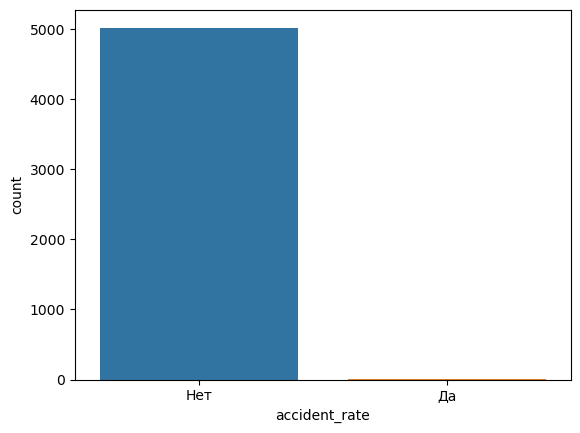

In [292]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

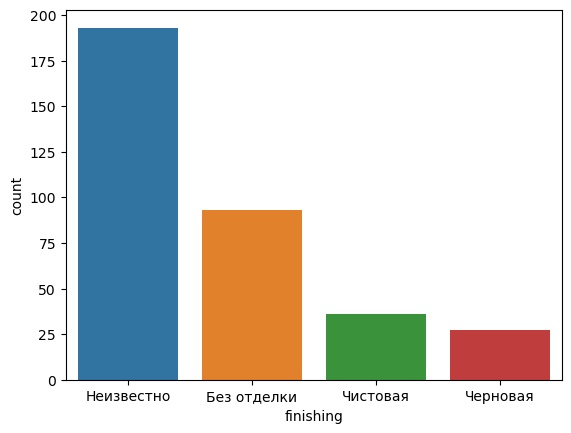

In [293]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

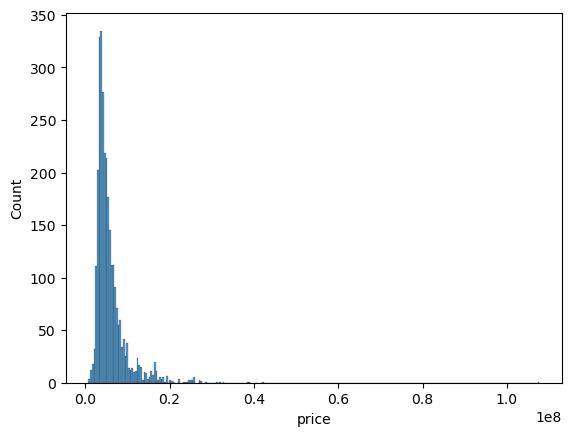

In [294]:
sns.histplot(data = df_domclick, x = 'price')

In [295]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

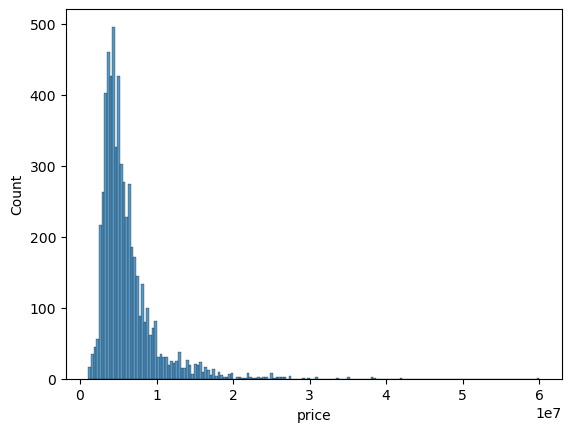

In [296]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

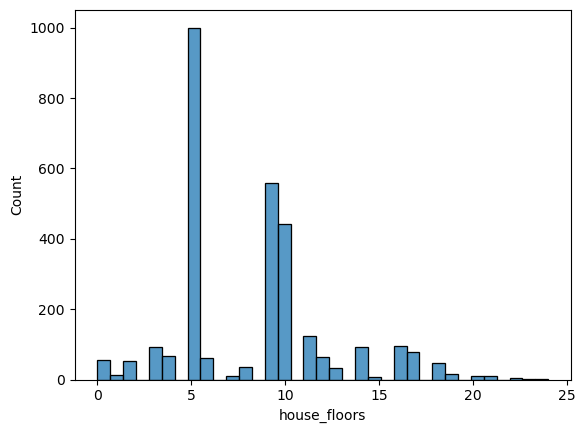

In [297]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

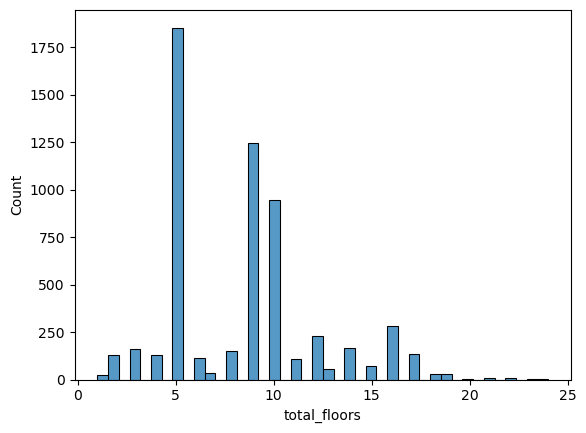

In [298]:
sns.histplot(data = df_cian, x = 'total_floors')

In [299]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

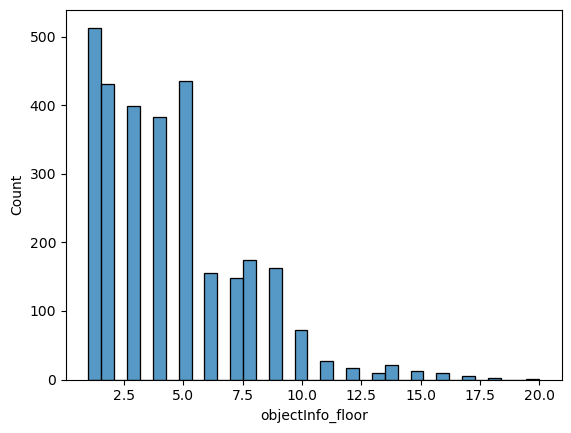

In [300]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

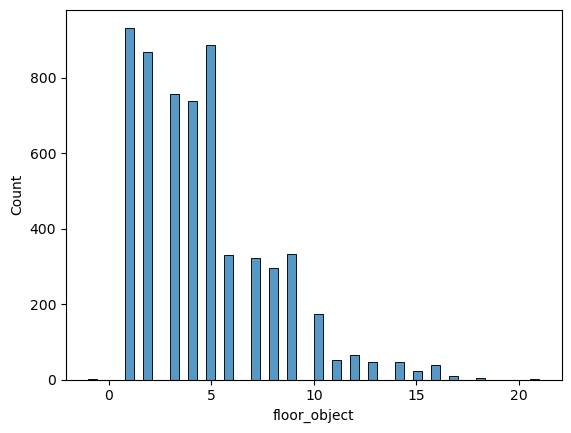

In [301]:
sns.histplot(data = df_cian, x = 'floor_object')

In [302]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
2141,1-комн. квартира,4120000,75458,-1,9,Вторичка,54.60000,20.0,12.0,NaN,1,NaN,2,2006,NaN,1,0,10,0,Нет,False,NaN,1,"Омская область, Омск, Кировский, мкр. Старый К...",https://omsk.cian.ru/sale/flat/290692173/,1
3028,1-комн. квартира,4700000,97917,-1,10,Вторичка,48.00000,20.0,15.0,2.7,1,1,0,2017,NaN,NaN,0,5,0,Нет,False,NaN,1,"Омская область, Омск, Кировский, мкр. Прибрежн...",https://omsk.cian.ru/sale/flat/292142488/,1


<Axes: xlabel='objectInfo_area', ylabel='Count'>

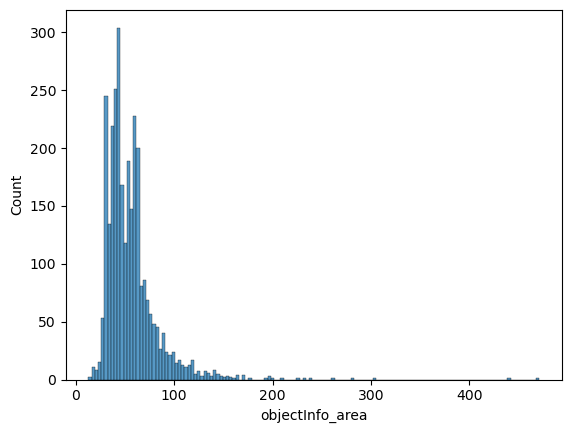

In [303]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

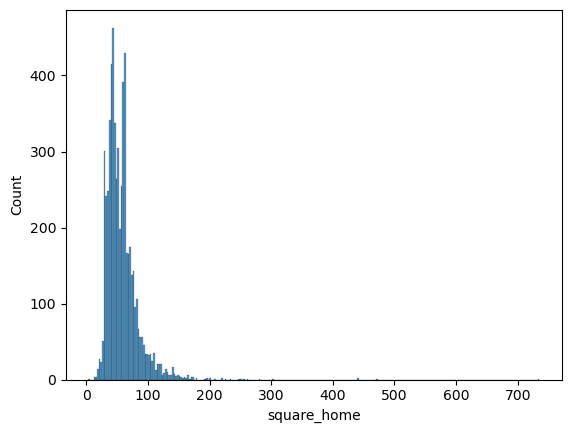

In [304]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

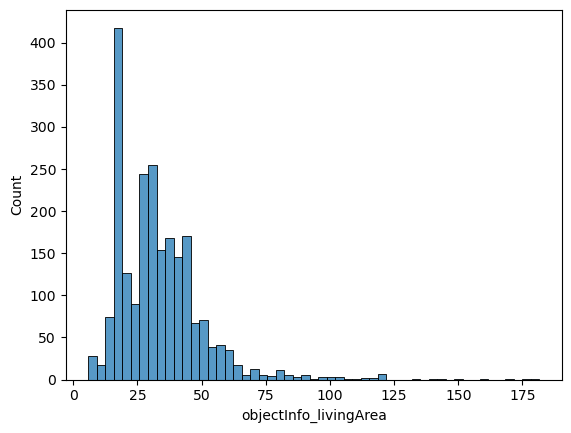

In [305]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

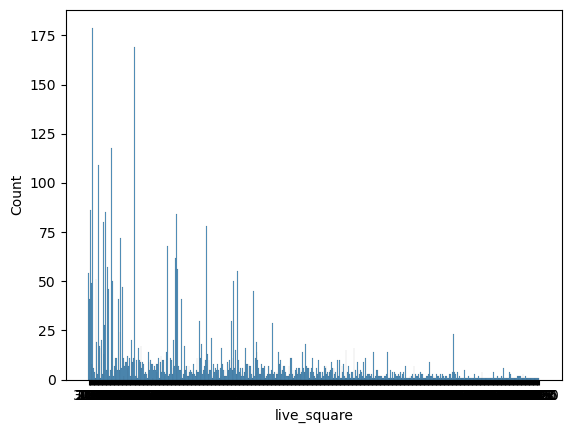

In [306]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

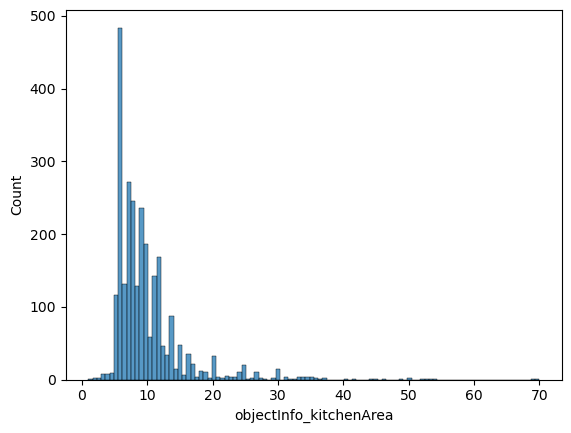

In [307]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

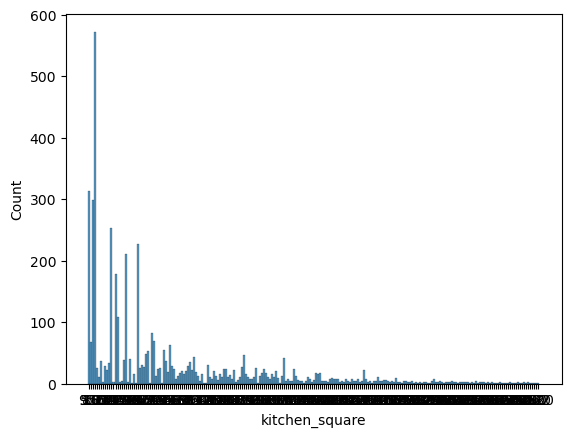

In [308]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

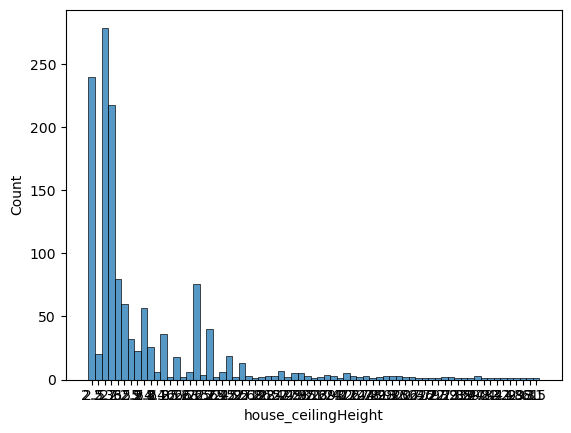

In [309]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

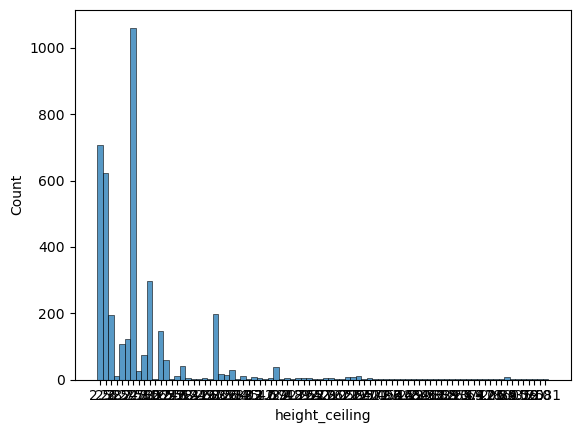

In [310]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

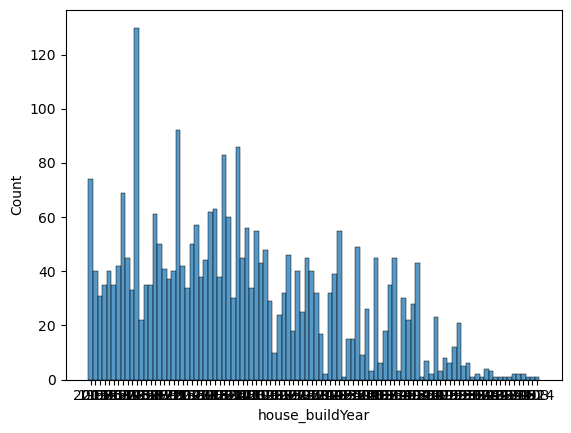

In [311]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

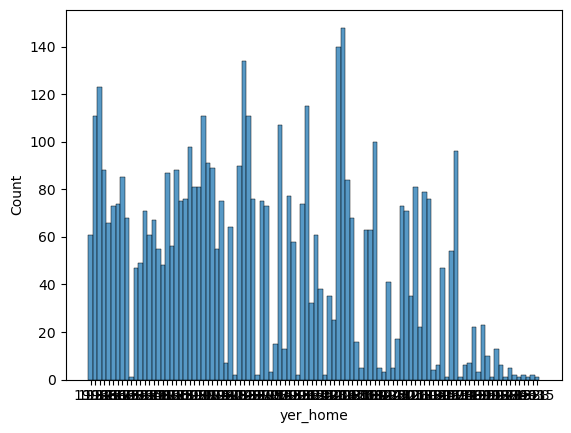

In [312]:
sns.histplot(data = df_cian, x = 'yer_home')

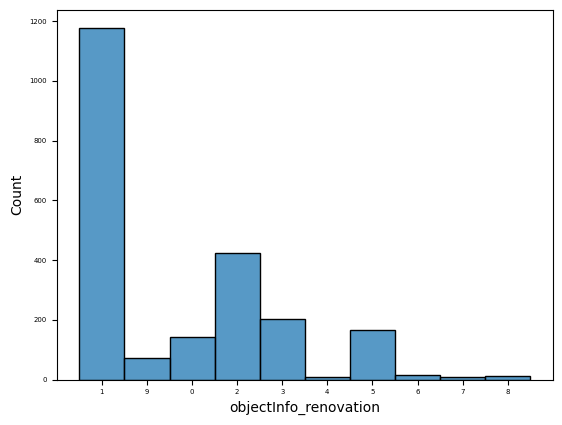

In [313]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [314]:
df_domclick['objectInfo_renovation'].unique()

array([nan, '1', '9', '0', '2', '3', '4', '5', '6', '7', '8'],
      dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

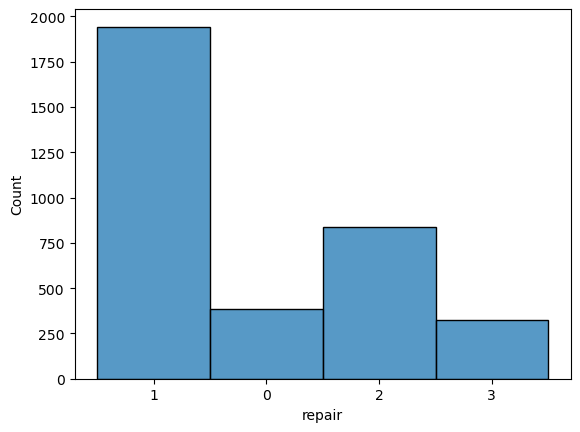

In [315]:
sns.histplot(data = df_cian, x = 'repair')

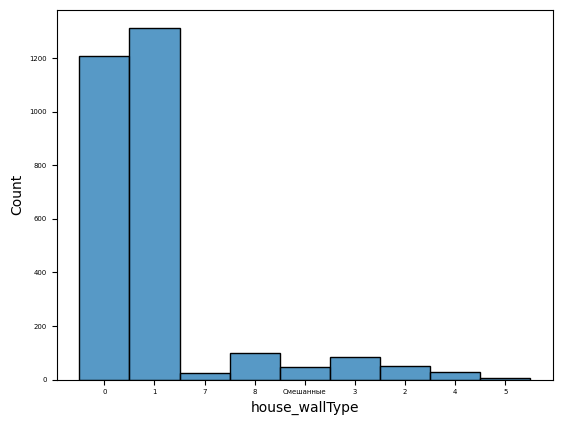

In [316]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [317]:
df_domclick['house_wallType'].unique()

array(['0', '1', '7', '8', 'Смешанные', '3', '2', nan, '4', '5'],
      dtype=object)

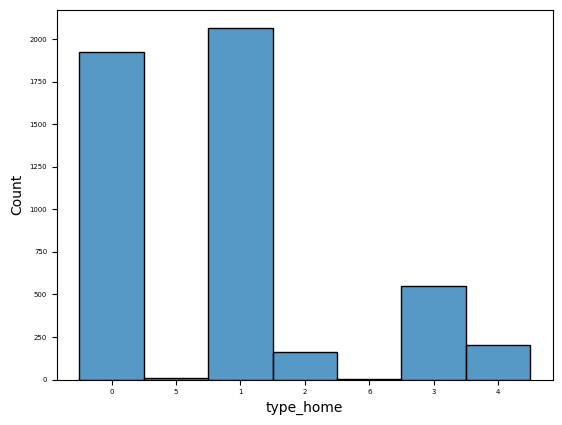

In [318]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [319]:
df_cian['type_home'].unique()

array(['0', nan, '5', '1', '2', '6', '3', '4'], dtype=object)

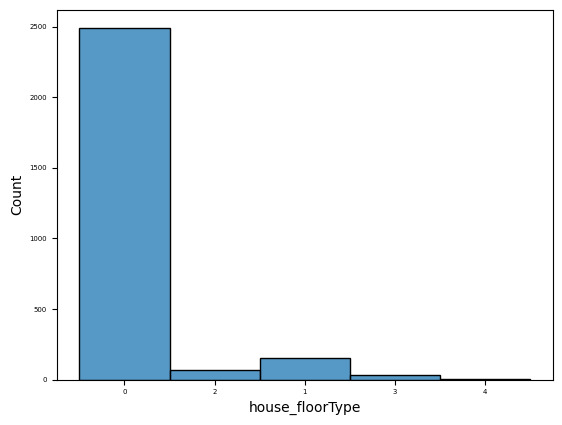

In [320]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [321]:
df_domclick['house_floorType'].unique()

array(['0', '2', '1', '3', nan, '4'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

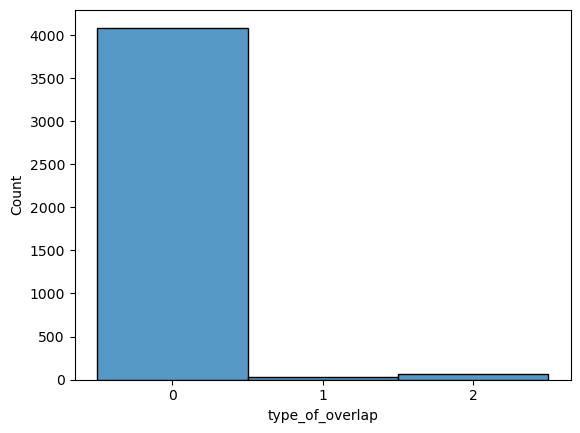

In [322]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

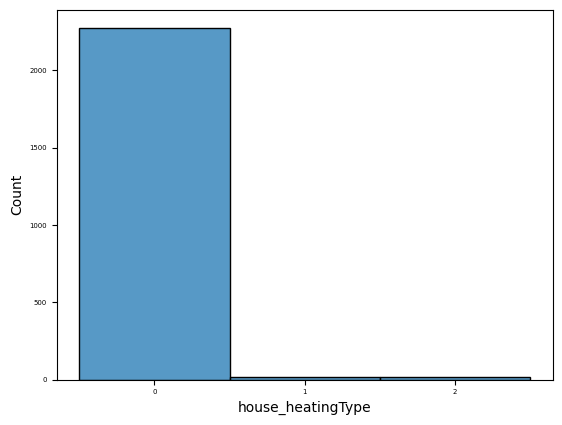

In [323]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [324]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '1', '2'], dtype=object)

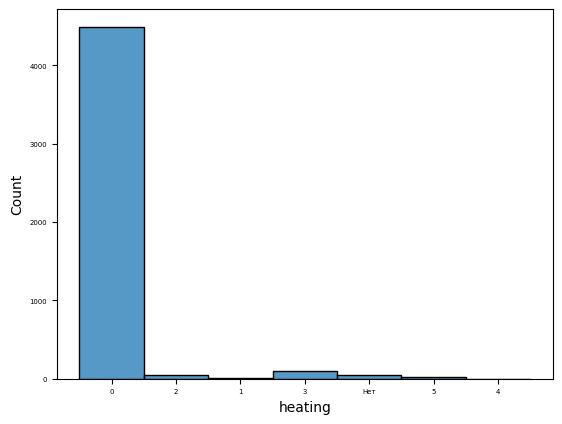

In [325]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [326]:
df_cian['heating'].unique()

array(['0', nan, '2', '1', '3', 'Нет', '5', '4'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

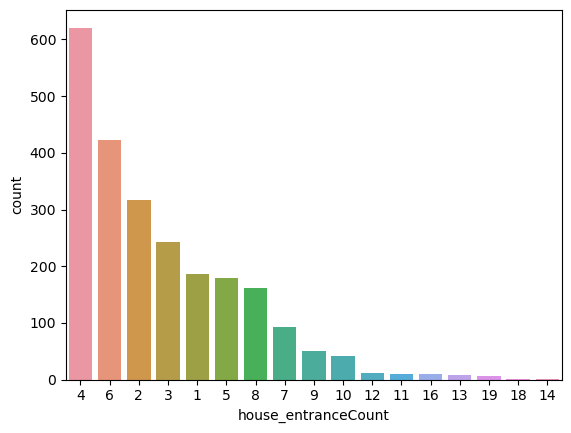

In [327]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

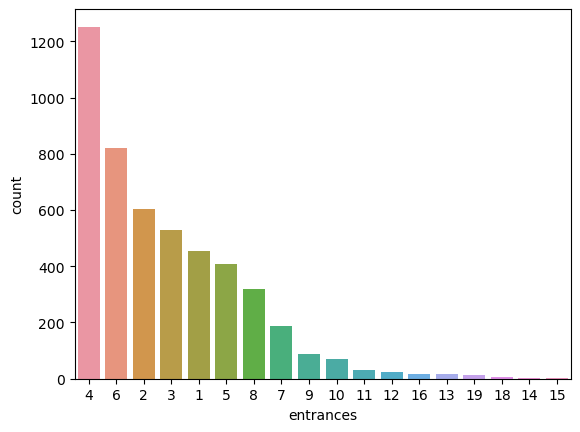

In [328]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

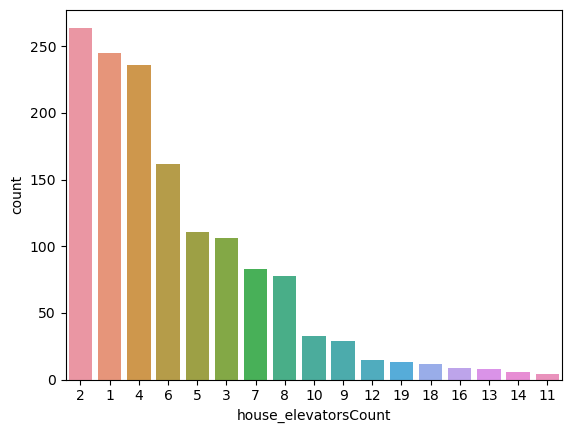

In [329]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

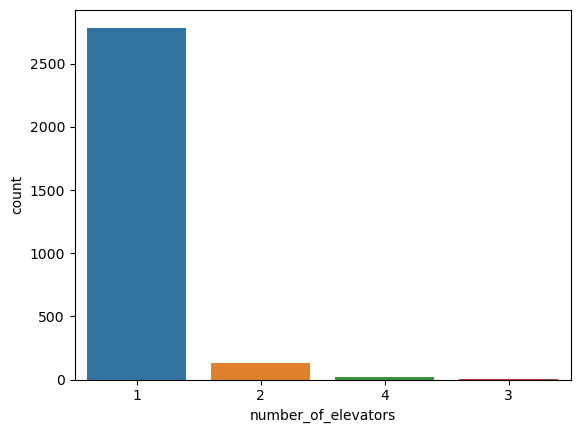

In [330]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [331]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2976 non-null   float64
 1   longitude                      2976 non-null   float64
 2   price                          2976 non-null   int64  
 3   house_floors                   2976 non-null   int64  
 4   house_buildYear                2952 non-null   object 
 5   house_ceilingHeight            1364 non-null   object 
 6   house_hasGarbageDisposer       2013 non-null   object 
 7   house_liftsFreight             1215 non-null   float64
 8   house_liftsPassenger           1667 non-null   float64
 9   house_wallType                 2867 non-null   object 
 10  house_areaNonResidential       2197 non-null   object 
 11  house_basementArea             2095 non-null   object 
 12  house_chuteCount               964 non-null    o

In [332]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2976 non-null   float64
 1   longitude                      2976 non-null   float64
 2   price                          2976 non-null   int64  
 3   house_floors                   2976 non-null   int64  
 4   house_buildYear                2952 non-null   object 
 5   house_ceilingHeight            1364 non-null   object 
 6   house_hasGarbageDisposer       2013 non-null   float64
 7   house_liftsFreight             1215 non-null   float64
 8   house_liftsPassenger           1667 non-null   float64
 9   house_wallType                 2867 non-null   object 
 10  house_areaNonResidential       2197 non-null   object 
 11  house_basementArea             2095 non-null   object 
 12  house_chuteCount               964 non-null    o

In [333]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [334]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2976 non-null   float64
 1   longitude                      2976 non-null   float64
 2   price                          2976 non-null   int64  
 3   house_floors                   2976 non-null   int64  
 4   house_buildYear                2952 non-null   float64
 5   house_ceilingHeight            1364 non-null   float64
 6   house_hasGarbageDisposer       2013 non-null   float64
 7   house_liftsFreight             1215 non-null   float64
 8   house_liftsPassenger           1667 non-null   float64
 9   house_wallType                 2820 non-null   float64
 10  house_areaNonResidential       2197 non-null   float64
 11  house_basementArea             2095 non-null   float64
 12  house_chuteCount               964 non-null    f

In [335]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5927 entries, 1 to 7453
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                5927 non-null   int64  
 1   price_for_metr       5927 non-null   int64  
 2   floor_object         5927 non-null   int64  
 3   total_floors         5927 non-null   int64  
 4   type_of_home         5927 non-null   object 
 5   square_home          5927 non-null   float64
 6   live_square          4331 non-null   object 
 7   kitchen_square       4500 non-null   object 
 8   height_ceiling       3942 non-null   object 
 9   bathroom             3246 non-null   object 
 10  balcony              4391 non-null   object 
 11  repair               3483 non-null   object 
 12  yer_home             5012 non-null   object 
 13  garbage_chute        973 non-null    object 
 14  type_home            4919 non-null   object 
 15  type_of_overlap      4181 non-null   object

In [336]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5927 entries, 1 to 7453
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                5927 non-null   int64  
 1   price_for_metr       5927 non-null   int64  
 2   floor_object         5927 non-null   int64  
 3   total_floors         5927 non-null   int64  
 4   type_of_home         5927 non-null   float64
 5   square_home          5927 non-null   float64
 6   live_square          4331 non-null   object 
 7   kitchen_square       4500 non-null   object 
 8   height_ceiling       3942 non-null   object 
 9   bathroom             3246 non-null   object 
 10  balcony              4391 non-null   object 
 11  repair               3483 non-null   object 
 12  yer_home             5012 non-null   object 
 13  garbage_chute        973 non-null    float64
 14  type_home            4919 non-null   object 
 15  type_of_overlap      4181 non-null   object

In [337]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [338]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5927 entries, 1 to 7453
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                5927 non-null   int64  
 1   price_for_metr       5927 non-null   int64  
 2   floor_object         5927 non-null   int64  
 3   total_floors         5927 non-null   int64  
 4   type_of_home         5927 non-null   float64
 5   square_home          5927 non-null   float64
 6   live_square          4331 non-null   float64
 7   kitchen_square       4500 non-null   float64
 8   height_ceiling       3942 non-null   float64
 9   bathroom             3246 non-null   float64
 10  balcony              4391 non-null   float64
 11  repair               3483 non-null   float64
 12  yer_home             5012 non-null   float64
 13  garbage_chute        973 non-null    float64
 14  type_home            4919 non-null   float64
 15  type_of_overlap      4181 non-null   float6

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
1,1100000,62147,1,5,0.00000,17.70000,NaN,NaN,2.50000,NaN,NaN,1.00000,1992.00000,NaN,0.00000,0.00000,2.00000,0.00000,0.00000,NaN,NaN,1
3,1200000,25105,1,2,0.00000,47.80000,32.00000,9.00000,NaN,1.00000,1.00000,0.00000,1984.00000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,2
4,1300000,50000,1,2,0.00000,26.00000,15.00000,5.00000,NaN,NaN,NaN,1.00000,NaN,0.00000,5.00000,NaN,NaN,NaN,0.00000,NaN,NaN,1
5,1250000,65789,3,5,0.00000,19.00000,NaN,5.00000,2.50000,1.00000,NaN,1.00000,1968.00000,NaN,NaN,NaN,1.00000,0.00000,0.00000,NaN,NaN,1
6,1300000,34211,1,1,0.00000,38.00000,28.00000,8.00000,NaN,NaN,NaN,1.00000,1977.00000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,2


In [339]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2976 non-null   float64
 1   longitude                      2976 non-null   float64
 2   price                          2976 non-null   int64  
 3   house_floors                   2976 non-null   int64  
 4   house_buildYear                2952 non-null   float64
 5   house_ceilingHeight            1364 non-null   float64
 6   house_hasGarbageDisposer       2013 non-null   float64
 7   house_liftsFreight             1215 non-null   float64
 8   house_liftsPassenger           1667 non-null   float64
 9   house_wallType                 2820 non-null   float64
 10  house_areaNonResidential       2197 non-null   float64
 11  house_basementArea             2095 non-null   float64
 12  house_chuteCount               964 non-null    f

# Соединение датасетов

In [340]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [341]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [342]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array([nan, '0', '1', '2', '3'], dtype=object)

In [343]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

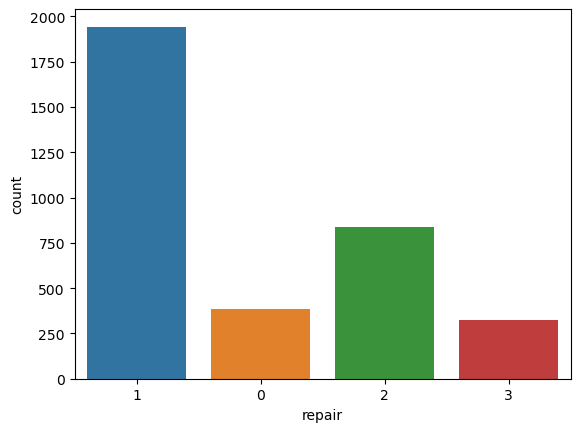

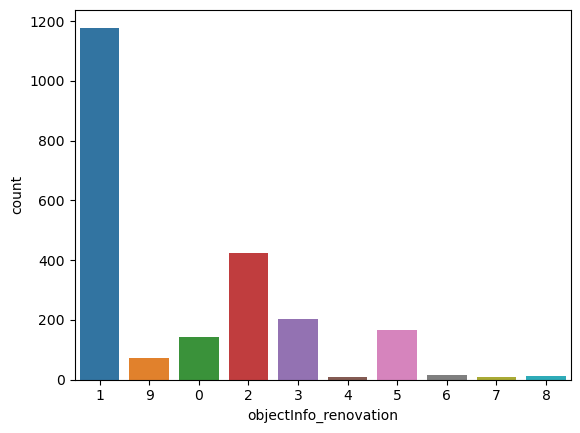

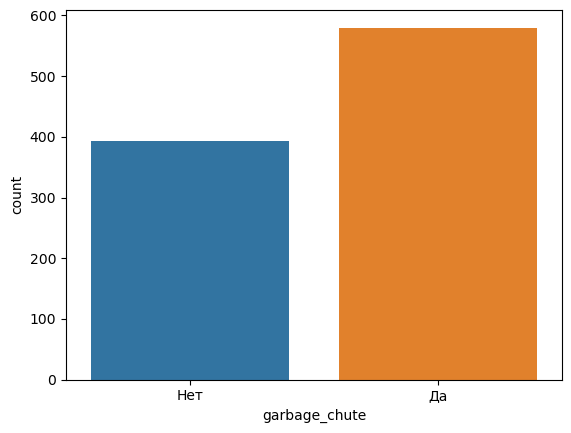

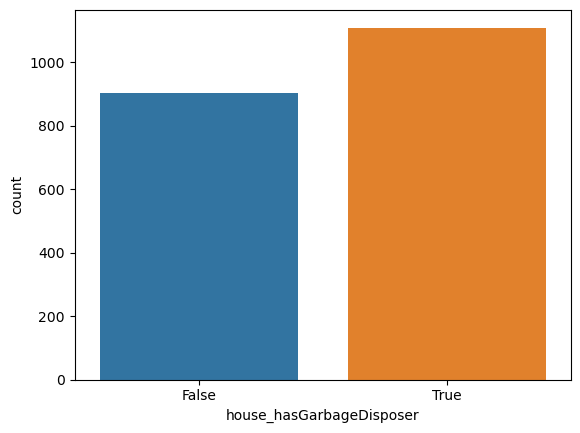

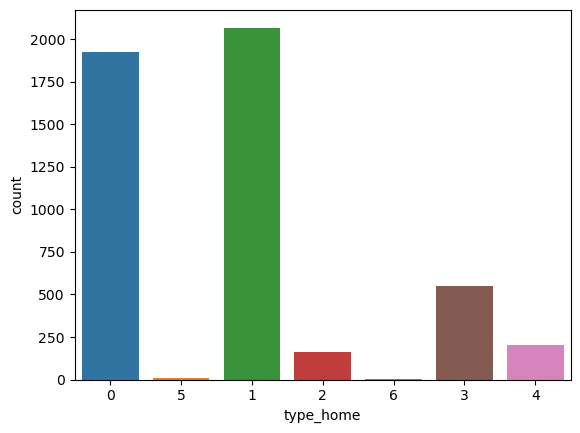

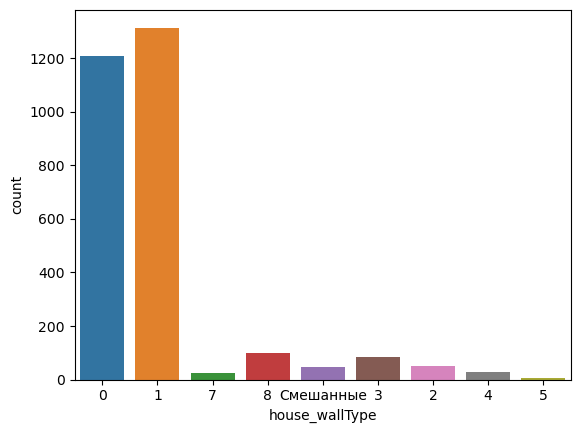

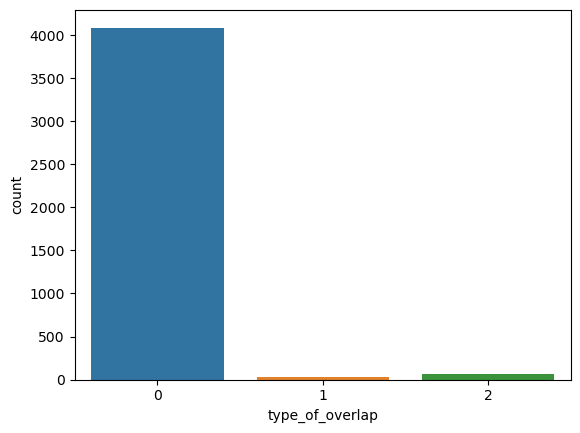

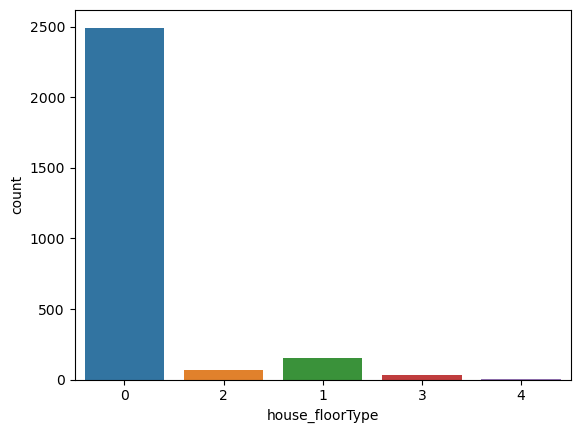

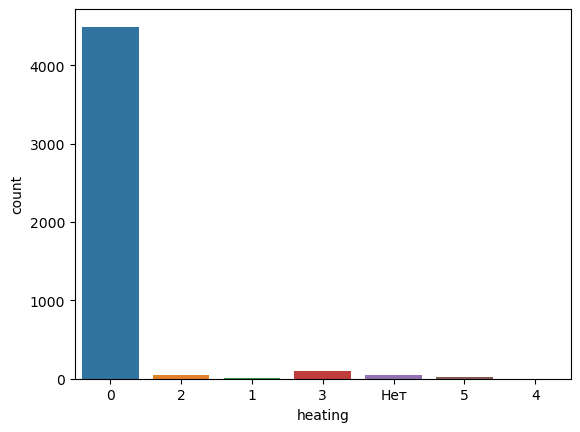

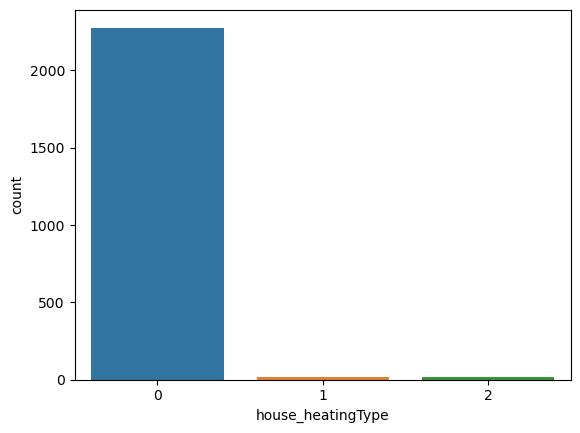

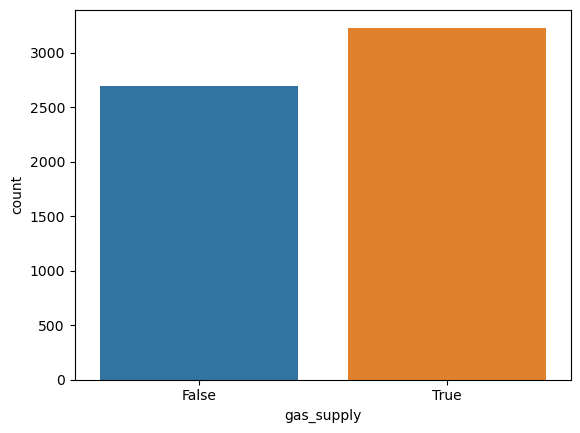

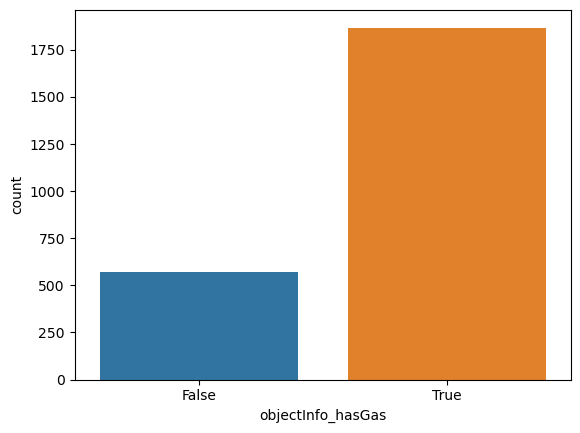

<Figure size 640x480 with 0 Axes>

In [344]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [345]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [346]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [347]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2976 non-null   int64  
 1   room_count       2976 non-null   int64  
 2   floor            2976 non-null   int64  
 3   totalFloors      2976 non-null   int64  
 4   area             2976 non-null   float64
 5   kitchenArea      2672 non-null   float64
 6   livingArea       2244 non-null   float64
 7   ceilingHeight    1364 non-null   float64
 8   bathroomCount    1492 non-null   float64
 9   balconyCount     2976 non-null   int64  
 10  repairType       2233 non-null   float64
 11  buildYear        2952 non-null   float64
 12  hasGarbageChute  2013 non-null   float64
 13  wallType         2820 non-null   float64
 14  floorType        2750 non-null   float64
 15  entranceCount    2361 non-null   float64
 16  heatingType      2306 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,3400000,0,4,10,33.10000,5.00000,24.20000,NaN,NaN,0,NaN,2015.00000,NaN,0.00000,0.00000,4.00000,0.00000,NaN,4.00000
1,1480000,1,4,5,18.80000,NaN,16.00000,2.50000,0.00000,0,1.00000,1967.00000,0.00000,1.00000,0.00000,2.00000,0.00000,0.00000,NaN
2,6400000,3,8,10,65.20000,13.40000,38.50000,NaN,1.00000,0,9.00000,2012.00000,1.00000,7.00000,0.00000,5.00000,0.00000,NaN,5.00000
3,3250000,1,8,9,32.40000,6.60000,16.90000,NaN,NaN,0,9.00000,1986.00000,1.00000,0.00000,0.00000,2.00000,0.00000,1.00000,2.00000
4,2800000,2,1,2,42.60000,6.00000,25.30000,NaN,NaN,0,9.00000,1965.00000,0.00000,1.00000,2.00000,2.00000,NaN,1.00000,NaN


In [348]:
merge_domclick['repairType'].unique()

array([nan,  1.,  9.,  0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [349]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5927 entries, 0 to 5926
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5927 non-null   int64  
 1   room_count       5927 non-null   int64  
 2   floor            5927 non-null   int64  
 3   totalFloors      5927 non-null   int64  
 4   area             5927 non-null   float64
 5   kitchenArea      4500 non-null   float64
 6   livingArea       4331 non-null   float64
 7   ceilingHeight    3942 non-null   float64
 8   bathroomCount    3246 non-null   float64
 9   balconyCount     4391 non-null   float64
 10  repairType       3483 non-null   float64
 11  buildYear        5012 non-null   float64
 12  hasGarbageChute  973 non-null    float64
 13  wallType         4919 non-null   float64
 14  floorType        4181 non-null   float64
 15  entranceCount    4839 non-null   float64
 16  heatingType      4701 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1100000,1,1,5,17.70000,NaN,NaN,2.50000,NaN,NaN,1.00000,1992.00000,NaN,0.00000,0.00000,2.00000,0.00000,0.00000,NaN
1,1200000,2,1,2,47.80000,9.00000,32.00000,NaN,1.00000,1.00000,0.00000,1984.00000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN
2,1300000,1,1,2,26.00000,5.00000,15.00000,NaN,NaN,NaN,1.00000,NaN,0.00000,5.00000,NaN,NaN,NaN,0.00000,NaN
3,1250000,1,3,5,19.00000,5.00000,NaN,2.50000,1.00000,NaN,1.00000,1968.00000,NaN,NaN,NaN,1.00000,0.00000,0.00000,NaN
4,1300000,2,1,1,38.00000,8.00000,28.00000,NaN,NaN,NaN,1.00000,1977.00000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN


In [350]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [351]:
df_combined = df_combined.drop_duplicates()

In [352]:
df_combined.reset_index(drop = True, inplace=True)

In [353]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8861 non-null   int64  
 1   room_count       8861 non-null   int64  
 2   floor            8861 non-null   int64  
 3   totalFloors      8861 non-null   int64  
 4   area             8861 non-null   float64
 5   kitchenArea      7136 non-null   float64
 6   livingArea       6539 non-null   float64
 7   ceilingHeight    5277 non-null   float64
 8   bathroomCount    4710 non-null   float64
 9   balconyCount     7329 non-null   float64
 10  repairType       5683 non-null   float64
 11  buildYear        7929 non-null   float64
 12  hasGarbageChute  2981 non-null   float64
 13  wallType         7697 non-null   float64
 14  floorType        6896 non-null   float64
 15  entranceCount    7166 non-null   float64
 16  heatingType      6973 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,3400000,0,4,10,33.10000,5.00000,24.20000,NaN,NaN,0.00000,NaN,2015.00000,NaN,0.00000,0.00000,4.00000,0.00000,NaN,4.00000
1,1480000,1,4,5,18.80000,NaN,16.00000,2.50000,0.00000,0.00000,1.00000,1967.00000,0.00000,1.00000,0.00000,2.00000,0.00000,0.00000,NaN
2,6400000,3,8,10,65.20000,13.40000,38.50000,NaN,1.00000,0.00000,9.00000,2012.00000,1.00000,7.00000,0.00000,5.00000,0.00000,NaN,5.00000
3,3250000,1,8,9,32.40000,6.60000,16.90000,NaN,NaN,0.00000,9.00000,1986.00000,1.00000,0.00000,0.00000,2.00000,0.00000,1.00000,2.00000
4,2800000,2,1,2,42.60000,6.00000,25.30000,NaN,NaN,0.00000,9.00000,1965.00000,0.00000,1.00000,2.00000,2.00000,NaN,1.00000,NaN


<Axes: xlabel='price', ylabel='Count'>

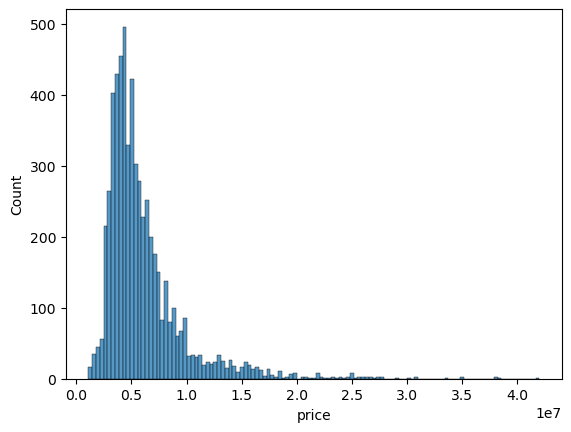

In [354]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

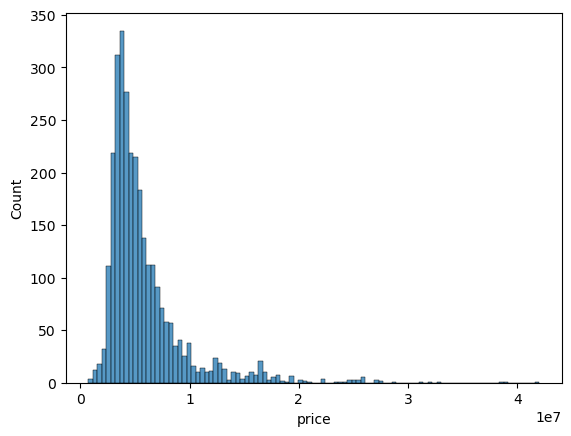

In [355]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

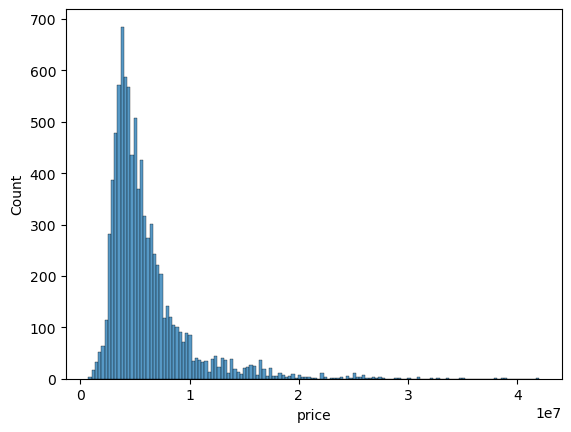

In [356]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

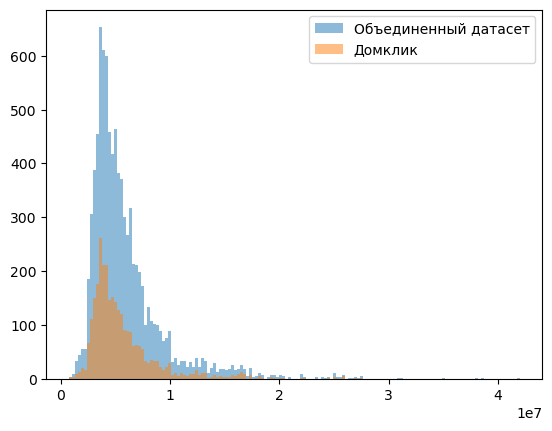

In [357]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

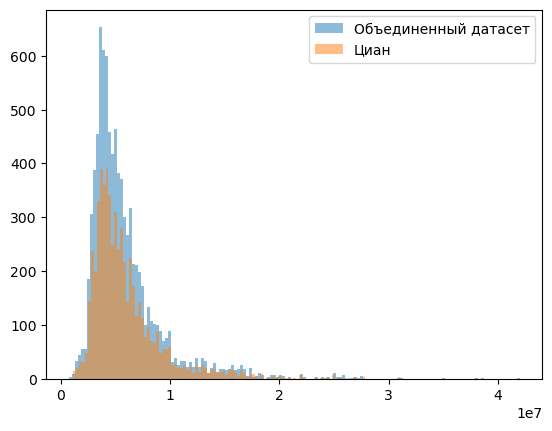

In [358]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

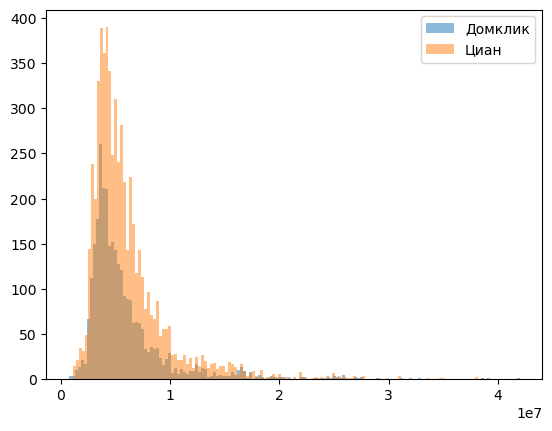

In [359]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [360]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [361]:
df_domclick_prepared['price'].describe()

count        2976.00000
mean      5894969.76310
std       4267987.53189
min        750000.00000
25%       3660000.00000
50%       4740000.00000
75%       6600000.00000
max     107699000.00000
Name: price, dtype: float64

In [362]:
df_cian_prepared['price'].describe()

count       5927.00000
mean     6073039.29188
std      3747249.65429
min      1100000.00000
25%      3850000.00000
50%      5025000.00000
75%      6985000.00000
max     60000000.00000
Name: price, dtype: float64

In [363]:
df_combined['price'].describe()

count        8861.00000
mean      6015424.47782
std       3934458.71359
min        750000.00000
25%       3799000.00000
50%       4975000.00000
75%       6850000.00000
max     107699000.00000
Name: price, dtype: float64

In [364]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [365]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_19252\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


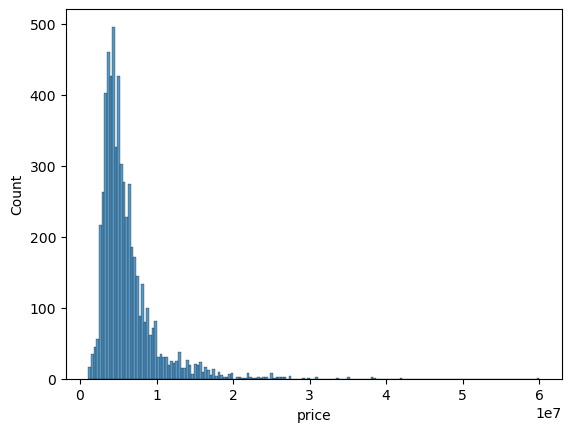

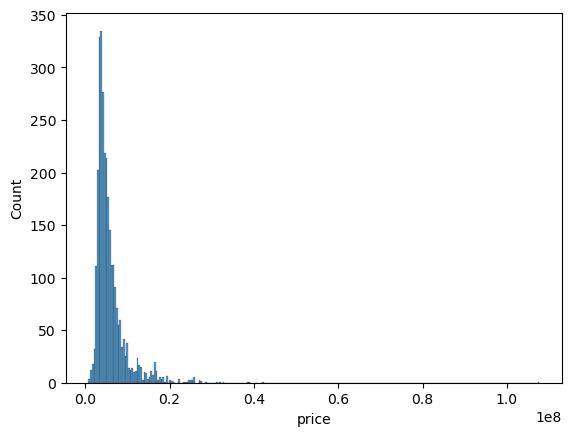

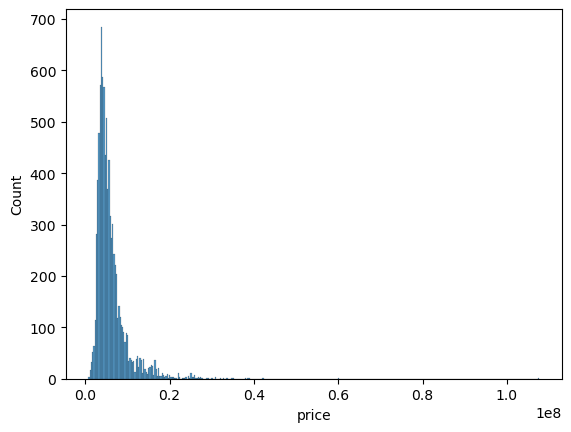

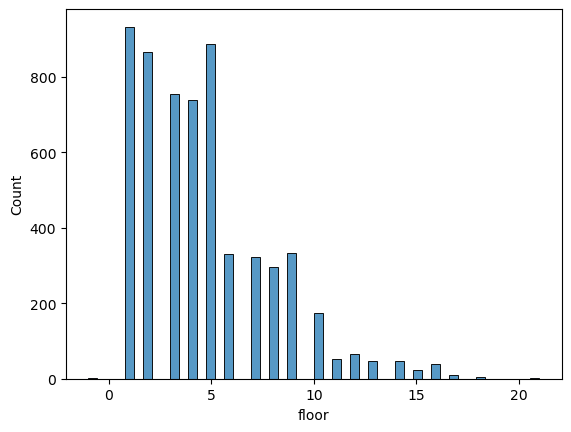

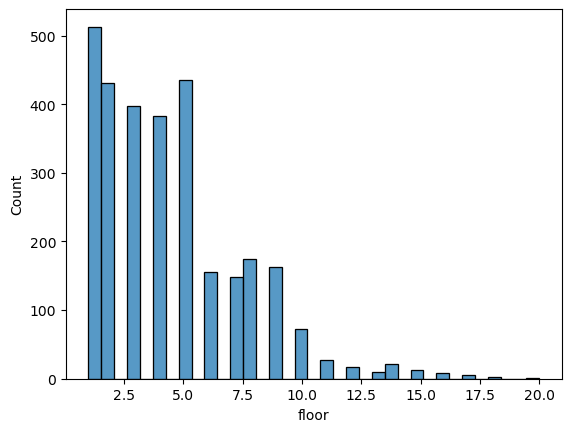

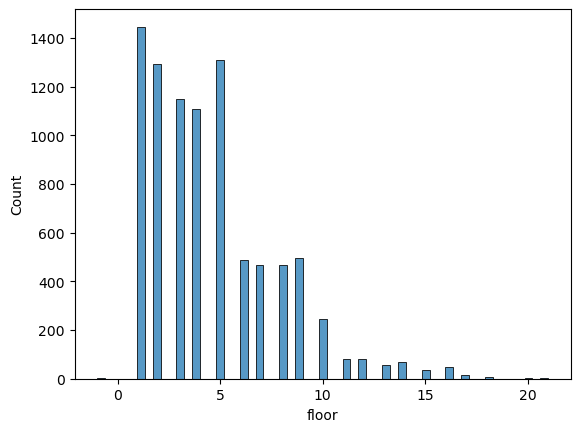

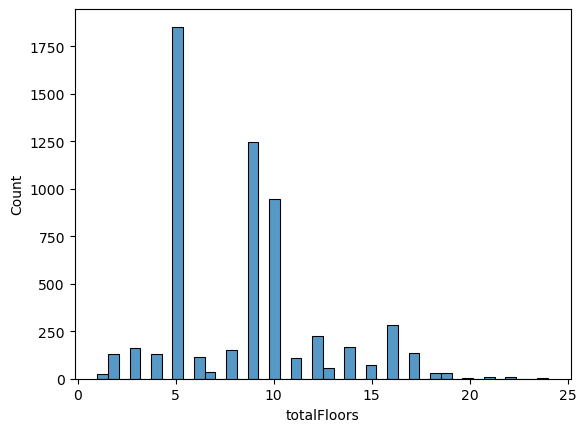

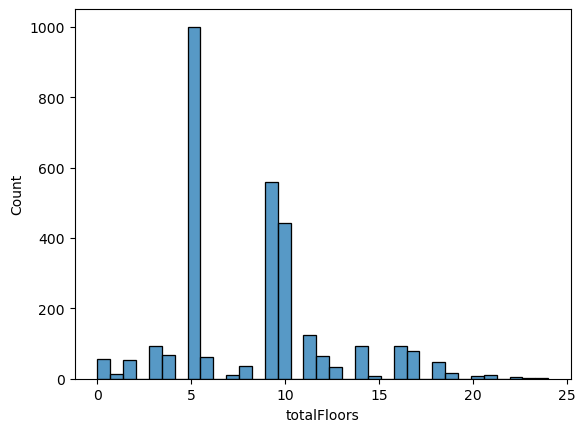

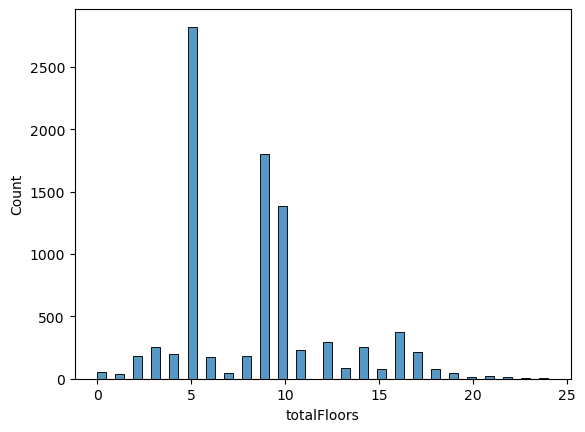

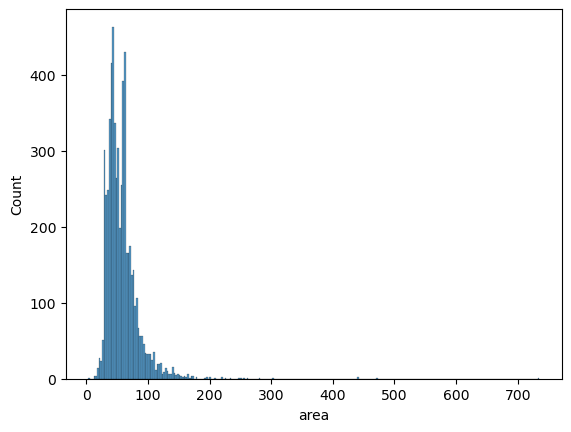

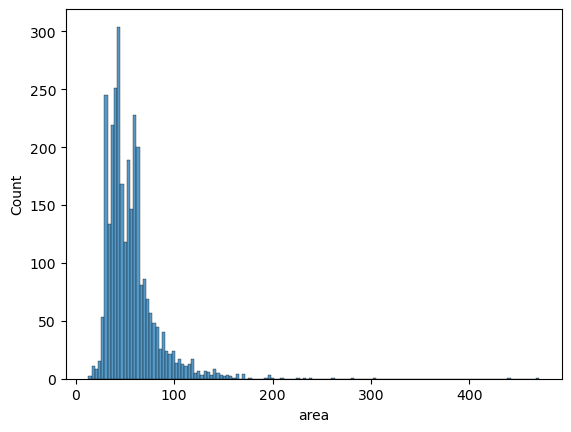

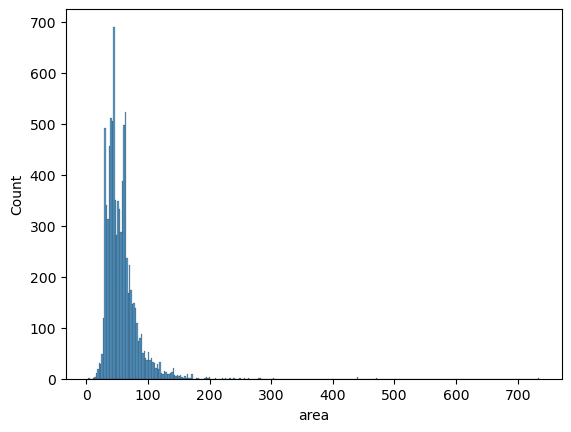

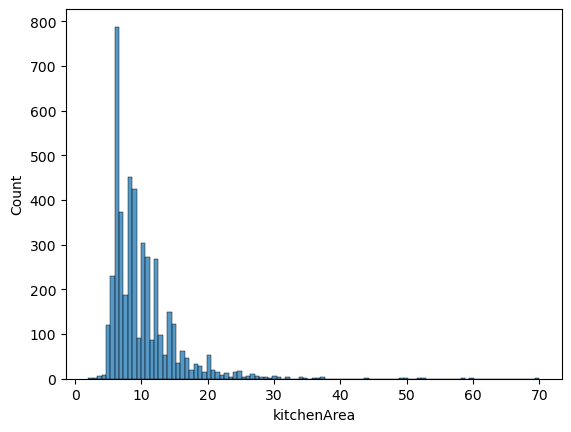

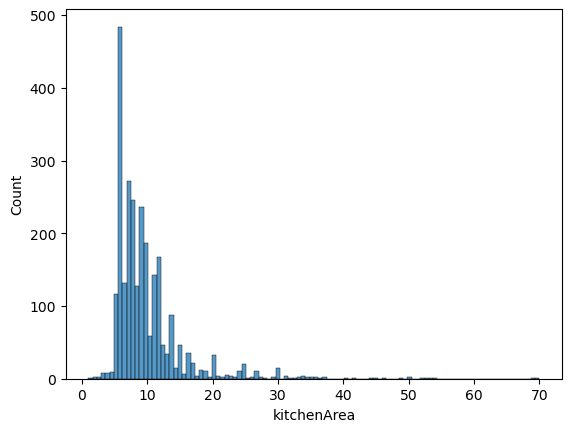

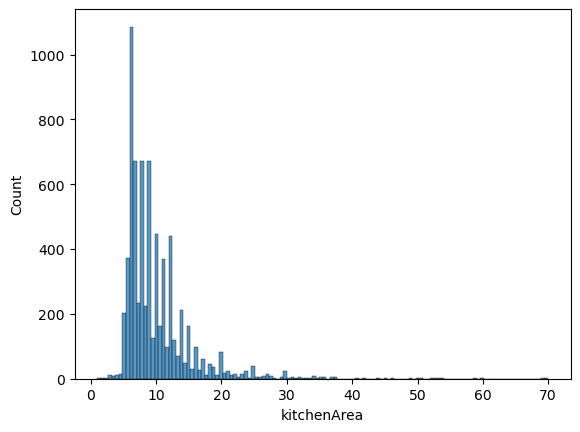

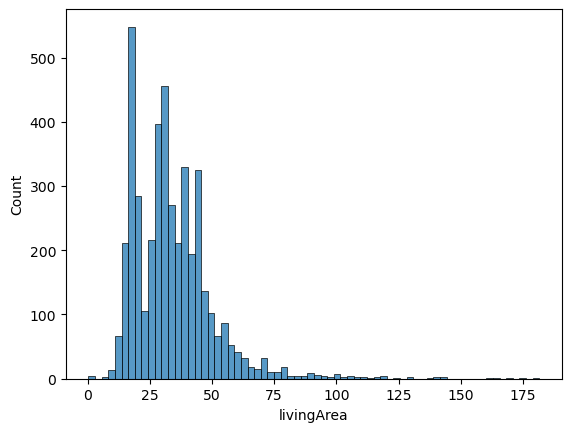

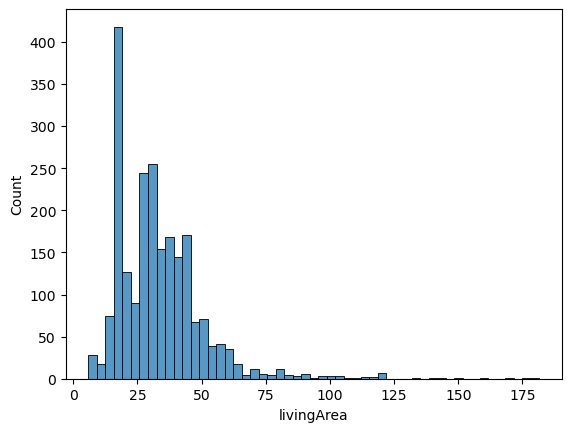

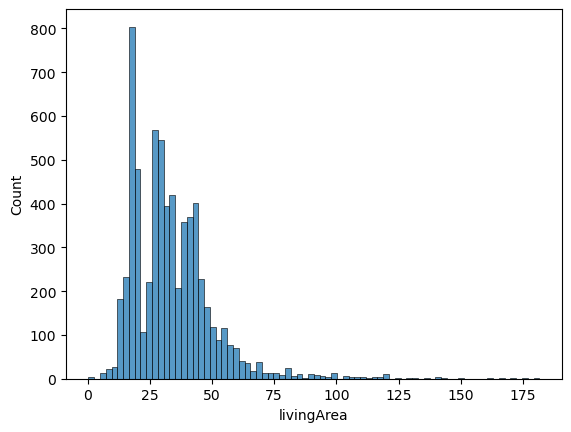

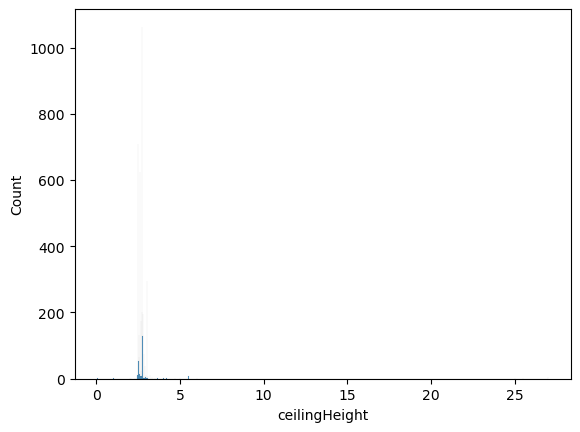

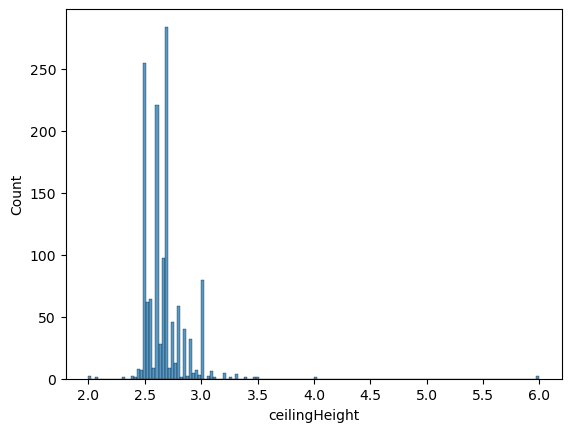

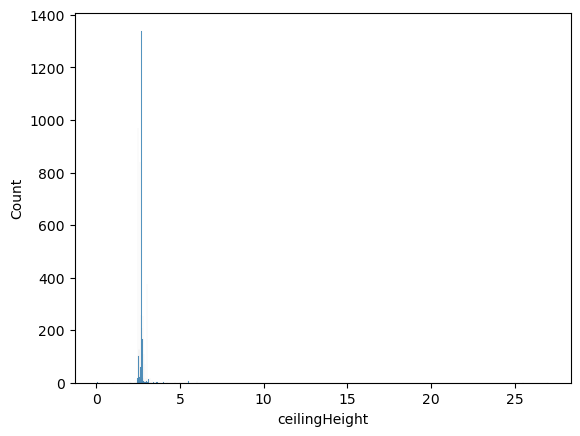

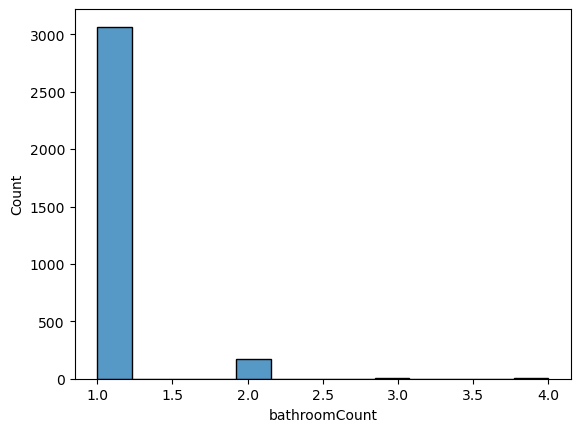

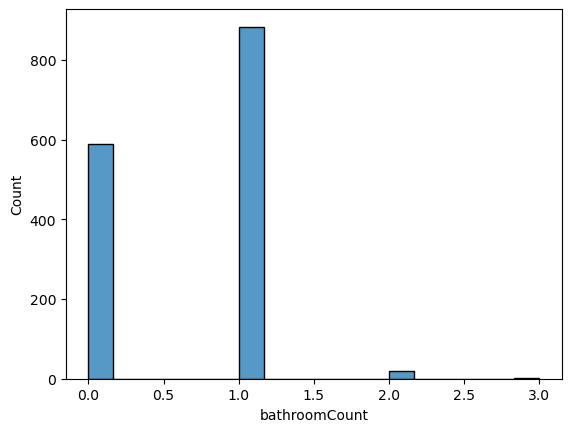

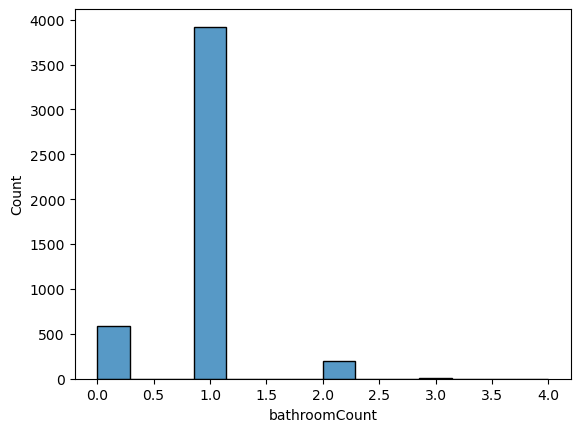

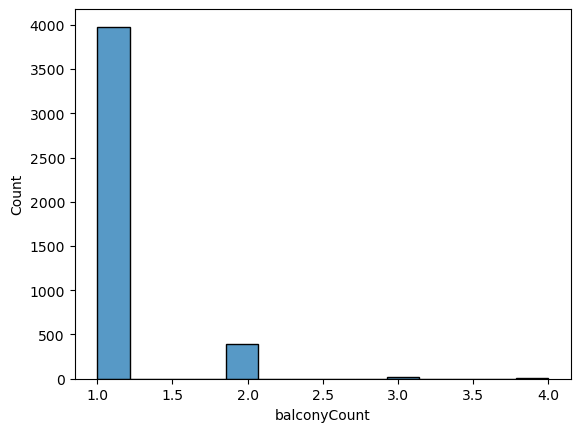

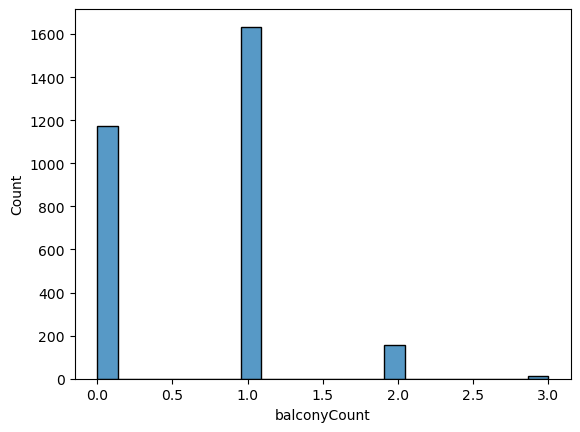

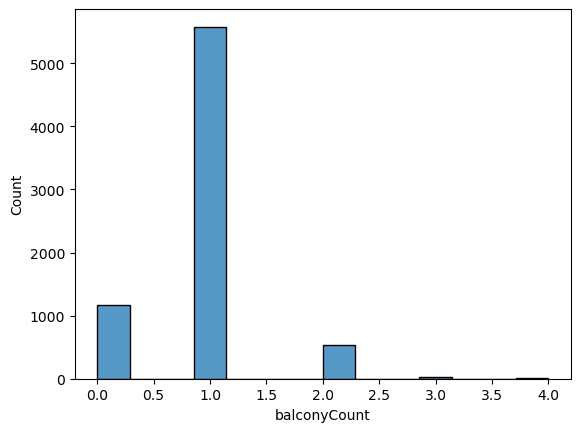

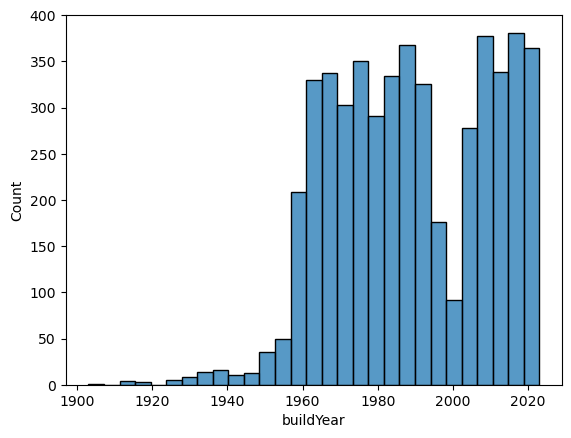

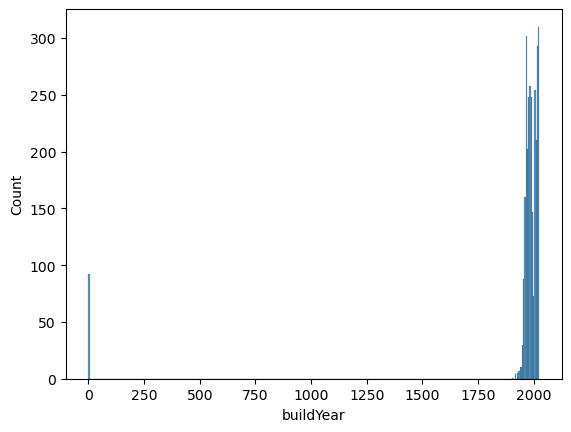

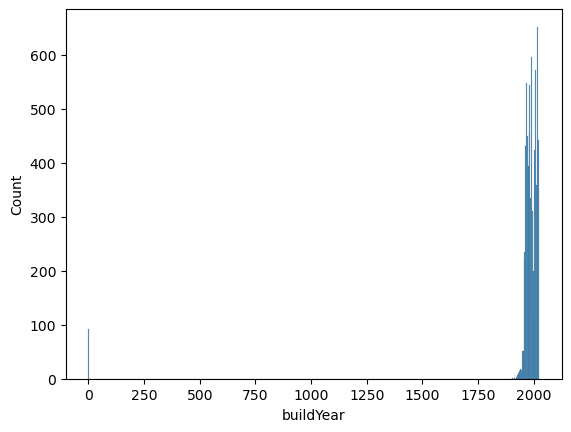

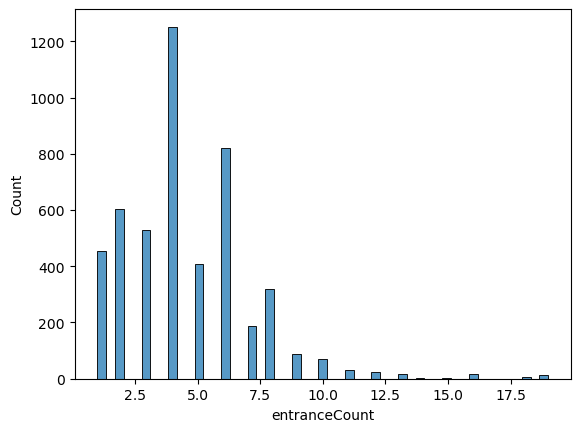

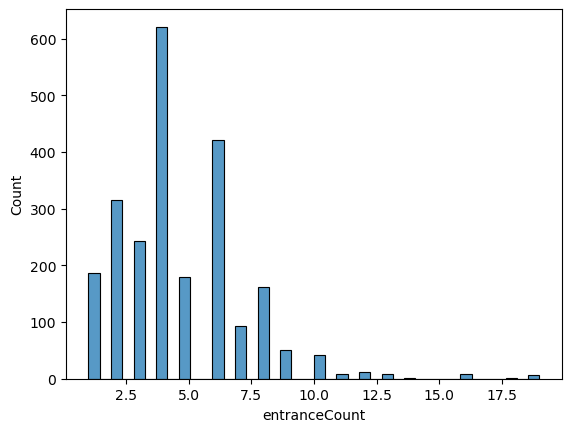

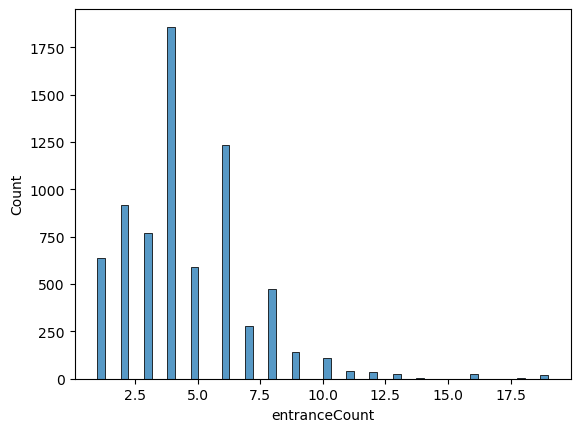

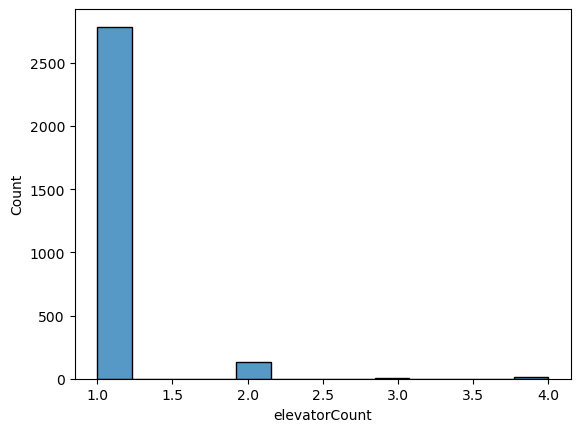

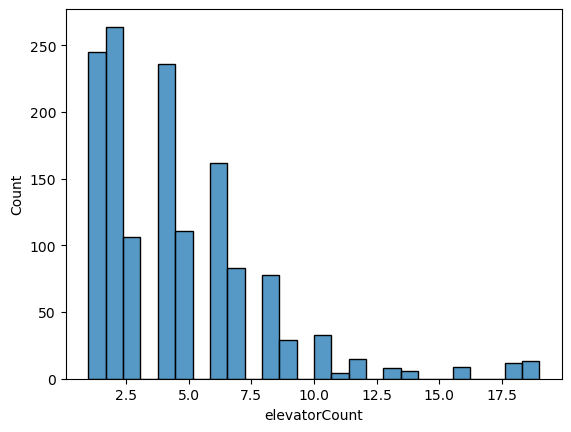

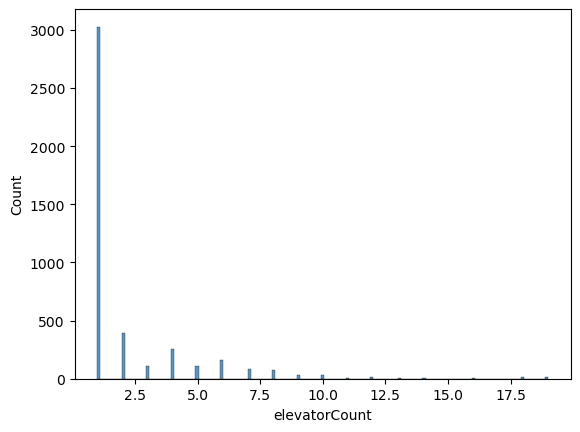

<Figure size 640x480 with 0 Axes>

In [366]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

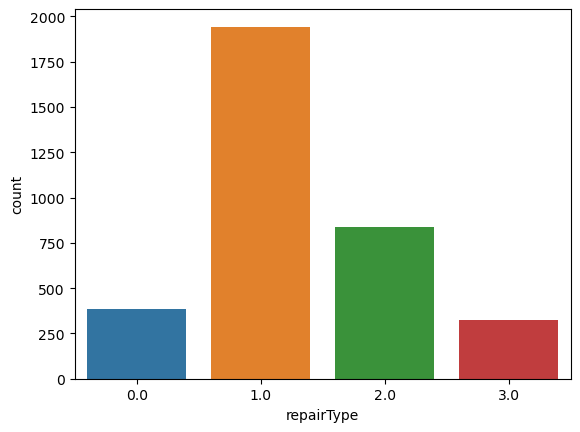

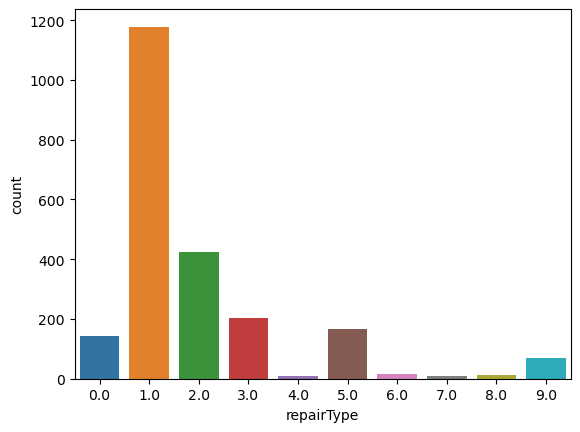

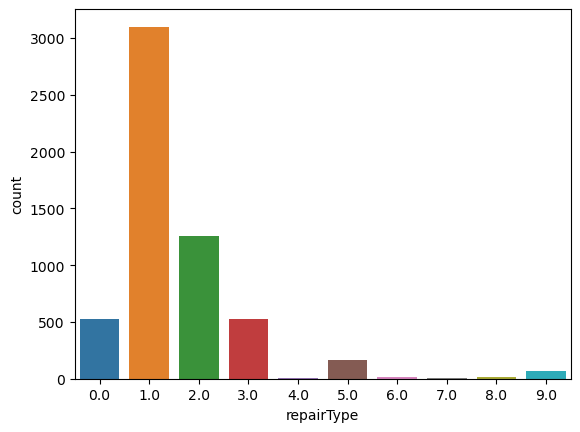

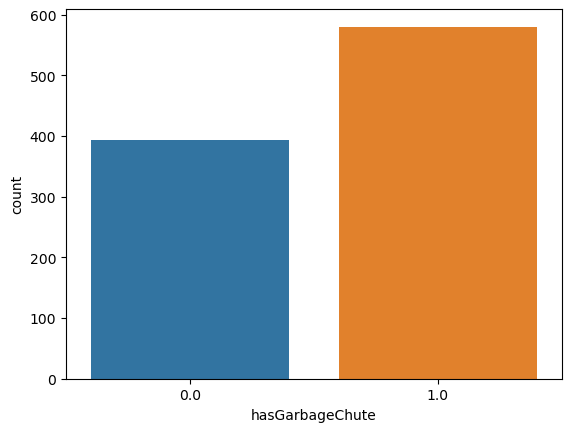

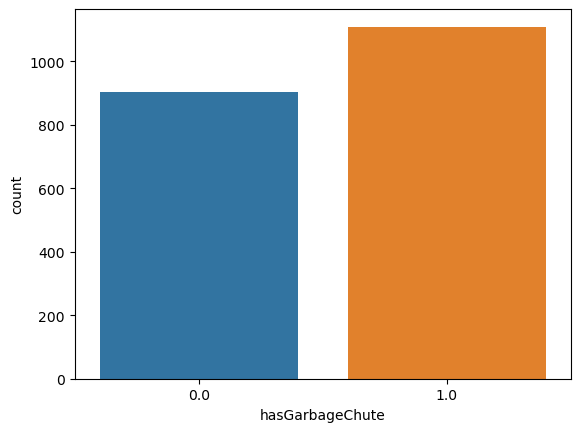

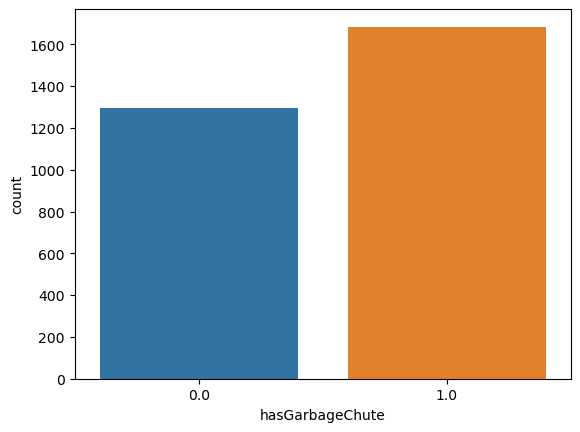

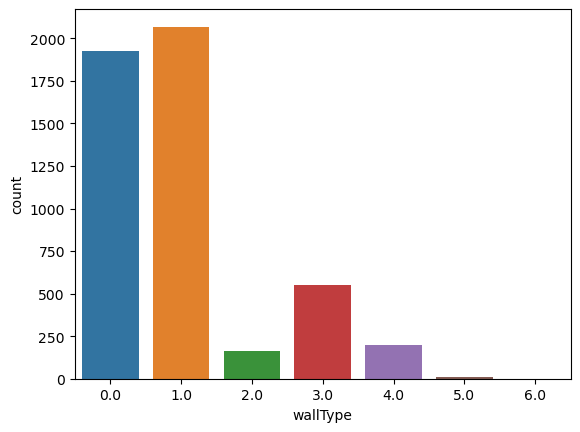

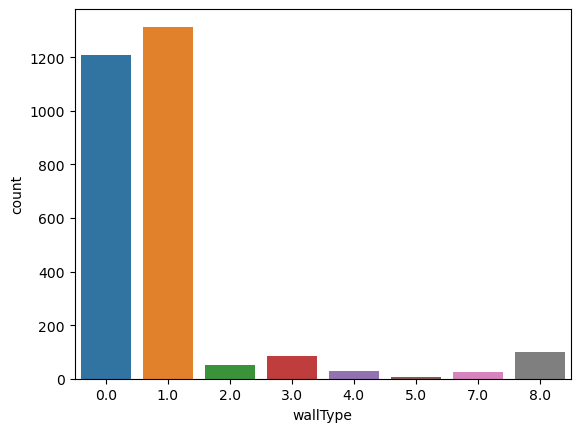

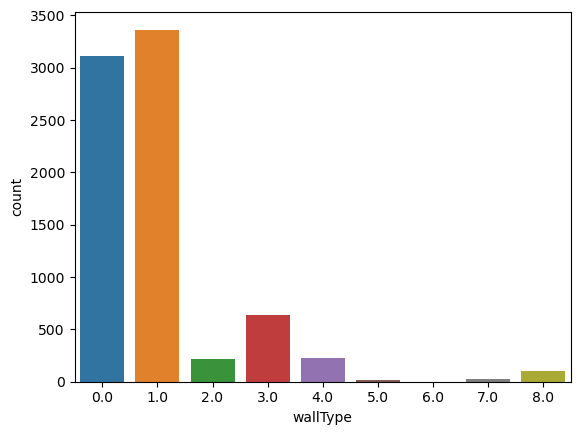

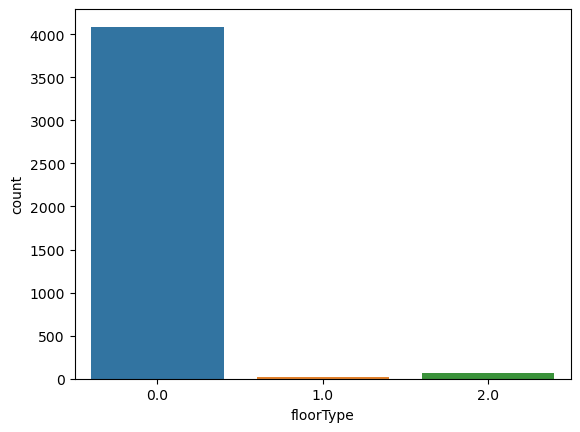

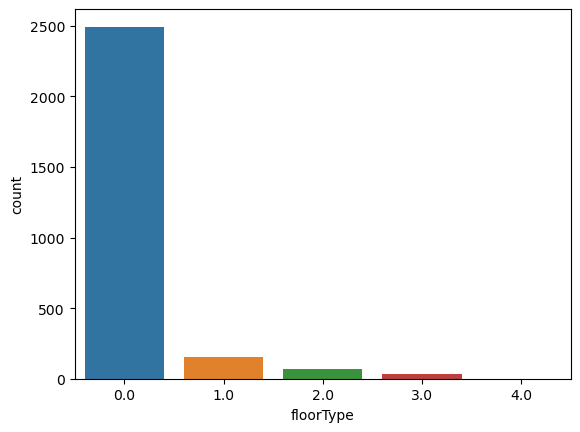

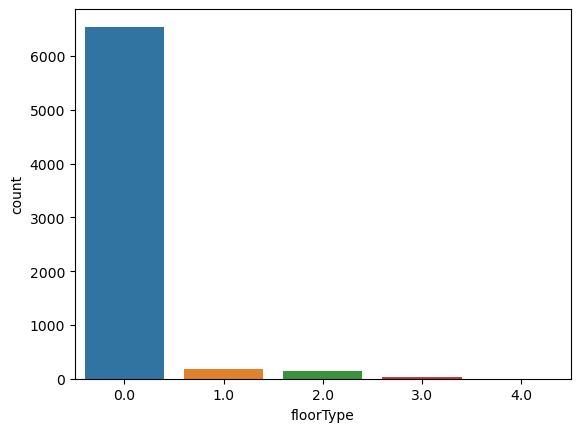

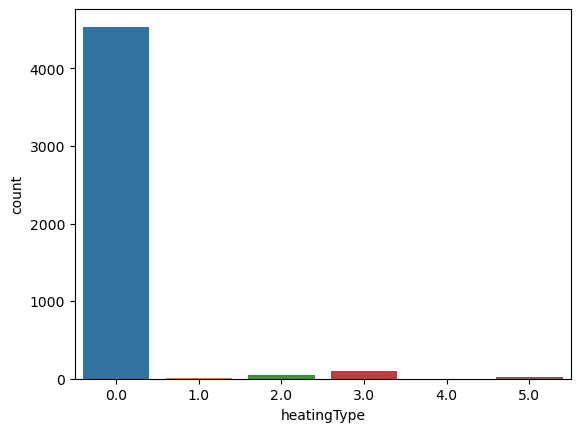

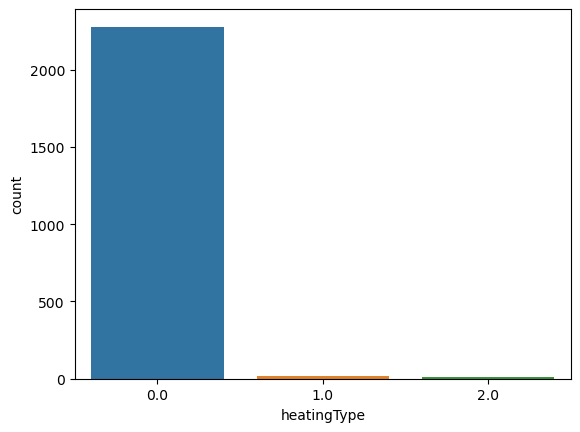

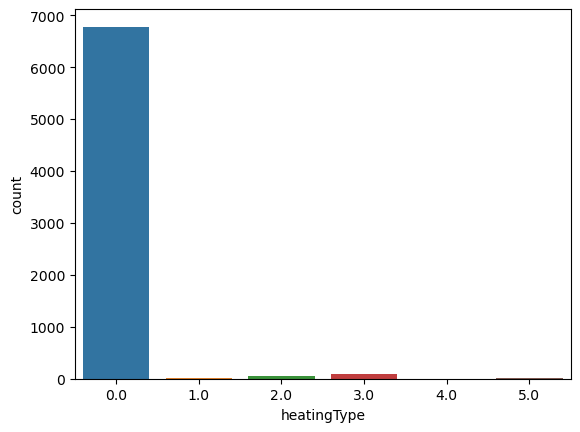

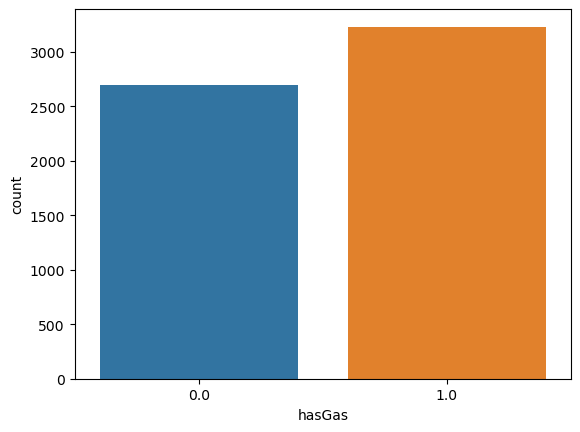

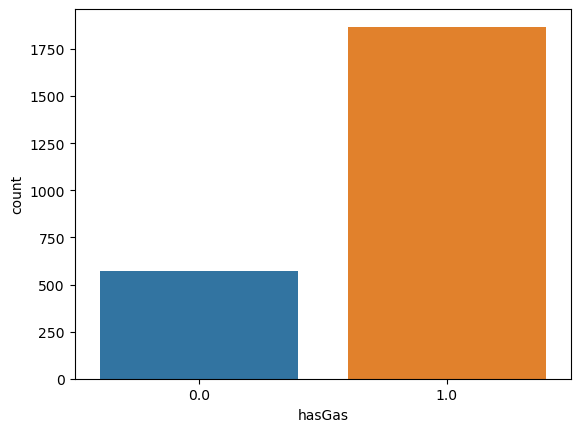

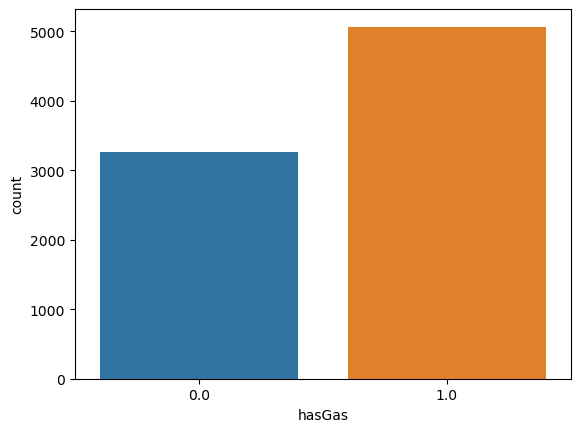

<Figure size 640x480 with 0 Axes>

In [367]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [368]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [369]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2976 non-null   float64
 1   longitude                      2976 non-null   float64
 2   price                          2976 non-null   int64  
 3   house_floors                   2976 non-null   int64  
 4   house_buildYear                2976 non-null   float64
 5   house_ceilingHeight            2976 non-null   float64
 6   house_hasGarbageDisposer       2976 non-null   float64
 7   house_liftsFreight             2976 non-null   float64
 8   house_liftsPassenger           2976 non-null   float64
 9   house_wallType                 2976 non-null   float64
 10  house_areaNonResidential       2976 non-null   float64
 11  house_basementArea             2976 non-null   float64
 12  house_chuteCount               2976 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,54.92257,73.41527,3400000,10,2015.00000,2.64000,0.00000,0.00000,1.00000,0.00000,0.00000,1479.00000,3.00000,0.00000,1.00000,1.00000,4.00000,2.00000,4.00000,2.00000,0.00000,4.00000,0.00000,100.00000,0.00000,1.00000,0.00000,0,33.10000,5.00000,24.20000,4,1.00000,0.00000,0,0.00000,2.00000
1,55.04249,73.27913,1480000,5,1967.00000,2.50000,0.00000,0.00000,0.00000,1.00000,477.30000,693.00000,2.00000,0.00000,0.00000,1.00000,2.00000,6.00000,2.00000,2.00000,0.00000,4.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1,18.80000,5.70000,16.00000,4,1.00000,0.00000,0,0.00000,1.00000
2,55.04582,73.32618,6400000,10,2012.00000,2.70000,1.00000,1.00000,1.00000,7.00000,0.00000,1424.00000,5.00000,0.00000,1.00000,1.00000,5.00000,4.00000,5.00000,2.00000,0.00000,4.00000,0.00000,0.00000,0.00000,1.00000,0.00000,3,65.20000,13.40000,38.50000,8,1.00000,1.00000,0,1.00000,9.00000
3,54.99817,73.25956,3250000,9,1986.00000,2.70000,1.00000,0.00000,1.00000,0.00000,0.00000,844.10000,2.00000,0.00000,1.00000,1.00000,2.00000,6.00000,2.00000,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,2.00000,1,32.40000,6.60000,16.90000,8,1.00000,1.00000,0,1.00000,9.00000
4,54.91682,73.31458,2800000,2,1965.00000,2.70000,0.00000,0.00000,0.00000,1.00000,332.30000,885.50000,2.00000,0.00000,1.00000,1.00000,2.00000,6.00000,2.00000,2.00000,2.00000,2.00000,0.00000,0.00000,0.00000,1.00000,2.00000,2,42.60000,6.00000,25.30000,1,1.00000,1.00000,0,1.00000,9.00000


In [370]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [371]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5927 entries, 1 to 7453
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                5927 non-null   int64  
 1   price_for_metr       5927 non-null   int64  
 2   floor_object         5927 non-null   int64  
 3   total_floors         5927 non-null   int64  
 4   type_of_home         5927 non-null   float64
 5   square_home          5927 non-null   float64
 6   live_square          5927 non-null   float64
 7   kitchen_square       5927 non-null   float64
 8   height_ceiling       5927 non-null   float64
 9   bathroom             5927 non-null   float64
 10  balcony              5927 non-null   float64
 11  repair               5927 non-null   float64
 12  yer_home             5927 non-null   float64
 13  garbage_chute        5927 non-null   float64
 14  type_home            5927 non-null   float64
 15  type_of_overlap      5927 non-null   float6

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
1,1100000,62147,1,5,0.00000,17.70000,14.00000,5.00000,2.50000,1.00000,1.00000,1.00000,1992.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,2.00000,2.00000,1
3,1200000,25105,1,2,0.00000,47.80000,32.00000,9.00000,5.50000,1.00000,1.00000,0.00000,1984.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,4.00000,1.00000,2
4,1300000,50000,1,2,0.00000,26.00000,15.00000,5.00000,2.54000,1.00000,1.00000,1.00000,1950.00000,0.00000,5.00000,1.00000,2.00000,0.00000,0.00000,2.00000,2.00000,1
5,1250000,65789,3,5,0.00000,19.00000,14.00000,5.00000,2.50000,1.00000,1.00000,1.00000,1968.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,2.00000,2.00000,1
6,1300000,34211,1,1,0.00000,38.00000,28.00000,8.00000,3.00000,1.00000,1.00000,1.00000,1977.00000,0.00000,3.00000,1.00000,1.00000,0.00000,0.00000,4.00000,1.00000,2


In [372]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [373]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8861 non-null   int64  
 1   room_count       8861 non-null   int64  
 2   floor            8861 non-null   int64  
 3   totalFloors      8861 non-null   int64  
 4   area             8861 non-null   float64
 5   kitchenArea      8861 non-null   float64
 6   livingArea       8861 non-null   float64
 7   ceilingHeight    8861 non-null   float64
 8   bathroomCount    8861 non-null   float64
 9   balconyCount     8861 non-null   float64
 10  repairType       8861 non-null   float64
 11  buildYear        8861 non-null   float64
 12  hasGarbageChute  8861 non-null   float64
 13  wallType         8861 non-null   float64
 14  floorType        8861 non-null   float64
 15  entranceCount    8861 non-null   float64
 16  heatingType      8861 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,3400000,0,4,10,33.10000,5.00000,24.20000,2.70000,1.00000,0.00000,1.00000,2015.00000,1.00000,0.00000,0.00000,4.00000,0.00000,0.00000,4.00000
1,1480000,1,4,5,18.80000,5.20000,16.00000,2.50000,0.00000,0.00000,1.00000,1967.00000,0.00000,1.00000,0.00000,2.00000,0.00000,0.00000,1.00000
2,6400000,3,8,10,65.20000,13.40000,38.50000,2.60000,1.00000,0.00000,9.00000,2012.00000,1.00000,7.00000,0.00000,5.00000,0.00000,1.00000,5.00000
3,3250000,1,8,9,32.40000,6.60000,16.90000,2.60000,0.00000,0.00000,9.00000,1986.00000,1.00000,0.00000,0.00000,2.00000,0.00000,1.00000,2.00000
4,2800000,2,1,2,42.60000,6.00000,25.30000,2.65000,0.00000,0.00000,9.00000,1965.00000,0.00000,1.00000,2.00000,2.00000,0.00000,1.00000,1.00000


In [374]:
combined_imputation['heatingType'].unique()

array([0., 1., 3., 5., 2., 4.])

In [375]:
combined_imputation['repairType'].unique()

array([1., 9., 0., 2., 3., 4., 5., 6., 7., 8.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [376]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [377]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [378]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [379]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  2366896021181.0913
MAE:  1032755.3703605824
RMSE:  1538471.9760792172
R2:  0.8497322846997618


In [380]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  797963239735.6066
MAE:  530858.5001466227
RMSE:  893287.88178034
R2:  0.9419530693954


In [381]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2560871786992.4907
MAE:  1033301.272564953
RMSE:  1600272.410245359
R2:  0.8099104749491828


## Случайный лес

In [382]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  2640787298234.7017
MAE:  836319.2347087814
RMSE:  1625049.9371510716
R2:  0.832343681197453


In [383]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  86447622403.15872
MAE:  76937.41168016194
RMSE:  294019.7653273649
R2:  0.9937114657810159


In [384]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2044241865480.509
MAE:  767124.1703380179
RMSE:  1429769.8645168422
R2:  0.8482591095454455


## Дерево решений

In [385]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  14384656546297.58
MAE:  1159405.4018817204
RMSE:  3792710.975845323
R2:  0.08675773872308523


In [386]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  279964575510.114
MAE:  148227.7995951417
RMSE:  529116.788157505
R2:  0.9796342945675462


In [387]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  4155513819082.7
MAE:  984063.9183212996
RMSE:  2038507.743199103
R2:  0.6915426800264661


## Метод k-ближайших соседей

In [388]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  10791519988351.975
MAE:  1815578.5532258062
RMSE:  3285044.898985701
R2:  0.3148760914062839


In [389]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  6009956401098.345
MAE:  1493173.2842105262
RMSE:  2451521.2422286584
R2:  0.5628125397520611


In [390]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2292059226955.898
MAE:  888319.2653429603
RMSE:  1513954.8298928533
R2:  0.8298640126954284


## Метод Опорных Векторов

In [391]:
svr_regressor_domclick = SVR()
svr_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = svr_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  17012544474761.58
MAE:  2312320.59694022
RMSE:  4124626.586099835
R2:  -0.08007963458844314


In [392]:
svr_regressor_cian = SVR()
svr_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = svr_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  14707982312134.197
MAE:  2267087.776703478
RMSE:  3835098.735643477
R2:  -0.06991548744653464


In [393]:
svr_regressor_combined = SVR()
svr_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = svr_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  14332992840181.94
MAE:  2182471.55187529
RMSE:  3785893.9288075594
R2:  -0.06391573970467523


## Перцептрон

In [394]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  23287488236622.01
MAE:  3360355.399269901
RMSE:  4825711.163820522
R2:  -0.4784585470096685


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [395]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  9497343090858.52
MAE:  1962504.8026243602
RMSE:  3081775.9637680543
R2:  0.3091265513611833


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [396]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  12871132866772.451
MAE:  2307759.103089657
RMSE:  3587636.1112538227
R2:  0.04459584976562747


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [397]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  2058329972555.33
MAE:  782247.2125336021
RMSE:  1434688.109853612
R2:  0.8693222940332


In [398]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  71208376663.71652
MAE:  109042.75514507422
RMSE:  266848.97725814226
R2:  0.9948200274237764


In [399]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1926586883498.7617
MAE:  773841.0551669676
RMSE:  1388015.4478602756
R2:  0.8569924556498354


# Сохранить модель

In [400]:
combined_imputation.to_csv('datasets_18features/combined_omsk_18feature.csv', index=False)

In [401]:
import pickle

rf_pkl_file = "models_18features/rf_model_omsk_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_omsk_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [402]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [403]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1873460917571.1042
MAE:  743566.015723096
RMSE:  1368744.2849455497
R2:  0.860935913374798


In [404]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2049531977422.666
MAE:  779603.7832806859
RMSE:  1431618.6564244914
R2:  0.8478664327735517


In [405]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_omsk_10feature.csv', index=False)

In [406]:
rf_pkl_file = "models_10features/rf_model_omsk_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_omsk_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [407]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                8861 non-null   int64  
 1   room_count           8861 non-null   int64  
 2   floor                8861 non-null   int64  
 3   totalFloors          8861 non-null   int64  
 4   area                 8861 non-null   float64
 5   kitchenArea          8861 non-null   float64
 6   livingArea           8861 non-null   float64
 7   ceilingHeight        8861 non-null   float64
 8   bathroomCount        8861 non-null   float64
 9   balconyCount         8861 non-null   float64
 10  buildYear            8861 non-null   float64
 11  entranceCount        8861 non-null   float64
 12  elevatorCount        8861 non-null   float64
 13  repairType_0.0       8861 non-null   bool   
 14  repairType_1.0       8861 non-null   bool   
 15  repairType_2.0       8861 non-null   b

In [408]:
combined_ohe.to_csv('datasets_18features_ohe/combined_omsk_18feature_ohe.csv', index=False)

In [409]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [410]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1840849141675.5713
MAE:  746603.991597831
RMSE:  1356778.958296292
R2:  0.8633566347176365


In [411]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2035740422811.7964
MAE:  763938.0110559567
RMSE:  1426793.7562282071
R2:  0.8488901583966026


In [412]:
rf_pkl_file = "models_18features_ohe/rf_model_omsk_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_omsk_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [423]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_omsk_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8861 non-null   int64  
 1   room_count       8861 non-null   int64  
 2   floor            8861 non-null   int64  
 3   totalFloors      8861 non-null   int64  
 4   area             8861 non-null   float64
 5   kitchenArea      8861 non-null   float64
 6   livingArea       8861 non-null   float64
 7   ceilingHeight    8861 non-null   float64
 8   buildYear        8861 non-null   float64
 9   repairType_0.0   8861 non-null   bool   
 10  repairType_1.0   8861 non-null   bool   
 11  repairType_2.0   8861 non-null   bool   
 12  repairType_3.0   8861 non-null   bool   
 13  repairType_4.0   8861 non-null   bool   
 14  repairType_5.0   8861 non-null   bool   
 15  repairType_6.0   8861 non-null   bool   
 16  repairType_7.0   8861 non-null   bool   
 17  repairType_8.0

In [424]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [425]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1969291596184.6084
MAE:  739282.7125565154
RMSE:  1403314.5036607469
R2:  0.853822551325411


In [426]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  3095577156355.4
MAE:  795995.6281588448
RMSE:  1759425.2346591486
R2:  0.7702201280053842


In [427]:
rf_pkl_file = "models_10features_ohe/rf_model_omsk_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_omsk_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# Предсказание цены

In [453]:
rf_pkl_file = "models_18features/rf_model_omsk_18features.pkl"
with open(rf_pkl_file, 'rb') as file3:  
    rf_regressor_combined = pickle.load(file3)

xgb_pkl_file = "models_18features/xgboost_model_omsk_18features.pkl"
with open(xgb_pkl_file, 'rb') as file3:  
    xgb_regressor_combined = pickle.load(file3)
    
combined_imputation = pd.read_csv("datasets_18features/combined_omsk_18feature.csv")

In [455]:
combined_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            8861 non-null   int64  
 1   room_count       8861 non-null   int64  
 2   floor            8861 non-null   int64  
 3   totalFloors      8861 non-null   int64  
 4   area             8861 non-null   float64
 5   kitchenArea      8861 non-null   float64
 6   livingArea       8861 non-null   float64
 7   ceilingHeight    8861 non-null   float64
 8   bathroomCount    8861 non-null   float64
 9   balconyCount     8861 non-null   float64
 10  repairType       8861 non-null   float64
 11  buildYear        8861 non-null   float64
 12  hasGarbageChute  8861 non-null   float64
 13  wallType         8861 non-null   float64
 14  floorType        8861 non-null   float64
 15  entranceCount    8861 non-null   float64
 16  heatingType      8861 non-null   float64
 17  hasGas        

In [456]:
flat1_combined = combined_imputation.iloc[44]
flat1_combined

price             22330000.00000
room_count               4.00000
floor                    6.00000
totalFloors              8.00000
area                   171.30000
kitchenArea             24.60000
livingArea             140.00000
ceilingHeight            3.00000
bathroomCount            2.00000
balconyCount             0.00000
repairType               3.00000
buildYear             2008.00000
hasGarbageChute          1.00000
wallType                 1.00000
floorType                0.00000
entranceCount            2.00000
heatingType              0.00000
hasGas                   0.00000
elevatorCount            1.00000
Name: 44, dtype: float64

In [444]:
flat1_cian = cian_imputation.iloc[5241]
flat1_cian

price                 9607699.00000
price_for_metr         117886.00000
floor_object                5.00000
total_floors               12.00000
type_of_home                3.00000
square_home                81.50000
live_square                38.80000
kitchen_square             20.50000
height_ceiling              2.72000
bathroom                    1.00000
balcony                     1.00000
repair                      2.00000
yer_home                 2017.00000
garbage_chute               1.00000
type_home                   3.00000
type_of_overlap             0.00000
entrances                   1.00000
heating                     0.00000
gas_supply                  0.00000
finishing                   1.00000
number_of_elevators         2.00000
room_count                  3.00000
Name: 6607, dtype: float64

In [445]:
flat2_combined = combined_imputation.iloc[2095]
flat2_combined

price             1300000.00000
room_count              1.00000
floor                   1.00000
totalFloors             2.00000
area                   26.00000
kitchenArea             5.00000
livingArea             15.00000
ceilingHeight           2.70000
bathroomCount           0.00000
balconyCount            0.00000
repairType              1.00000
buildYear            2015.00000
hasGarbageChute         0.00000
wallType                5.00000
floorType               0.00000
entranceCount           1.00000
heatingType             1.00000
hasGas                  0.00000
elevatorCount           1.00000
Name: 2095, dtype: float64

In [446]:
combined_imputation.query('price < 1500000')

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
1,1480000,1,4,5,18.80000,5.20000,16.00000,2.50000,0.00000,0.00000,1.00000,1967.00000,0.00000,1.00000,0.00000,2.00000,0.00000,0.00000,1.00000
363,750000,0,1,1,17.00000,3.00000,18.00000,2.70000,1.00000,0.00000,3.00000,1929.00000,0.00000,5.00000,1.00000,4.00000,0.00000,0.00000,1.00000
487,790000,1,1,1,20.00000,5.00000,15.00000,3.00000,1.00000,0.00000,0.00000,1950.00000,0.00000,1.00000,2.00000,2.00000,0.00000,0.00000,2.00000
969,1278000,1,2,5,13.00000,2.80000,8.30000,2.50000,1.00000,0.00000,1.00000,1967.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,10.00000
1058,1350000,1,1,1,27.70000,8.00000,17.70000,2.80000,0.00000,0.00000,1.00000,1948.00000,0.00000,5.00000,2.00000,2.00000,0.00000,0.00000,5.00000
2095,1300000,1,1,2,26.00000,5.00000,15.00000,2.70000,0.00000,0.00000,1.00000,2015.00000,0.00000,5.00000,0.00000,1.00000,1.00000,0.00000,1.00000
2382,1200000,2,3,3,42.00000,5.00000,32.00000,2.60000,0.00000,0.00000,1.00000,1961.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,1.00000
2669,1360000,2,1,1,35.50000,3.70000,25.50000,2.50000,0.00000,0.00000,1.00000,0.00000,0.00000,8.00000,2.00000,8.00000,0.00000,1.00000,8.00000
2727,1320000,1,3,5,16.00000,2.00000,12.00000,2.55000,1.00000,0.00000,5.00000,1992.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,1.00000
2779,1090000,7,5,5,17.00000,11.00000,17.00000,2.60000,1.00000,1.00000,9.00000,1962.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,6.00000


In [447]:
flat2_cian = cian_imputation.iloc[5545]
flat2_cian

price                 12200000.00000
price_for_metr          113806.00000
floor_object                 3.00000
total_floors                16.00000
type_of_home                 0.00000
square_home                107.20000
live_square                 59.00000
kitchen_square              16.00000
height_ceiling               2.70000
bathroom                     1.00000
balcony                      1.00000
repair                       3.00000
yer_home                  2007.00000
garbage_chute                0.00000
type_home                    0.00000
type_of_overlap              0.00000
entrances                    1.00000
heating                      0.00000
gas_supply                   0.00000
finishing                    2.00000
number_of_elevators          1.00000
room_count                   3.00000
Name: 7017, dtype: float64

In [448]:
flat3_combined = combined_imputation.iloc[6953]
flat3_combined

price             6241000.00000
room_count              3.00000
floor                  12.00000
totalFloors            14.00000
area                   63.30000
kitchenArea            10.40000
livingArea             38.60000
ceilingHeight           2.70000
bathroomCount           1.00000
balconyCount            1.00000
repairType              2.00000
buildYear            2016.00000
hasGarbageChute         0.00000
wallType                3.00000
floorType               0.00000
entranceCount           2.00000
heatingType             0.00000
hasGas                  0.00000
elevatorCount           1.00000
Name: 6953, dtype: float64

In [449]:
flat4_combined = combined_imputation.iloc[3883]
flat4_combined

price             3700000.00000
room_count              1.00000
floor                   4.00000
totalFloors            10.00000
area                   34.20000
kitchenArea            10.00000
livingArea             22.00000
ceilingHeight           2.60000
bathroomCount           1.00000
balconyCount            1.00000
repairType              1.00000
buildYear            2007.00000
hasGarbageChute         0.00000
wallType                3.00000
floorType               0.00000
entranceCount           6.00000
heatingType             0.00000
hasGas                  0.00000
elevatorCount           1.00000
Name: 3883, dtype: float64

In [450]:
flat3_cian = cian_imputation.iloc[3717]
flat3_cian

price                 5905000.00000
price_for_metr          94631.00000
floor_object                5.00000
total_floors                9.00000
type_of_home                0.00000
square_home                62.40000
live_square                38.90000
kitchen_square             12.00000
height_ceiling              2.64000
bathroom                    1.00000
balcony                     1.00000
repair                      1.00000
yer_home                 1978.00000
garbage_chute               1.00000
type_home                   0.00000
type_of_overlap             0.00000
entrances                   6.00000
heating                     0.00000
gas_supply                  1.00000
finishing                   2.00000
number_of_elevators         1.00000
room_count                  3.00000
Name: 4560, dtype: float64

In [457]:
print('Actual price of your flat:', flat1_combined['price'])

flat1_combined = flat1_combined.drop(index = "price")
y_pred = xgb_regressor_combined.predict(flat1_combined.array.reshape(1, -1))
print('Price suggested by XGBoost:', y_pred[0])

y_pred = rf_regressor_combined.predict(flat1_combined.array.reshape(1, -1))
print('Price suggested by Random Forest:', y_pred[0])

Actual price of your flat: 22330000.0
Price suggested by XGBoost: 22931796.0
Price suggested by Random Forest: 22851286.0


In [458]:
print('Actual price of your flat:', flat2_combined['price'])

flat2_combined = flat2_combined.drop(index = "price")
y_pred = xgb_regressor_combined.predict(flat2_combined.array.reshape(1, -1))
print('Price suggested by XGBoost:', y_pred[0])

y_pred = rf_regressor_combined.predict(flat2_combined.array.reshape(1, -1))
print('Price suggested by Random Forest:', y_pred[0])

Actual price of your flat: 1300000.0
Price suggested by XGBoost: 1446941.9
Price suggested by Random Forest: 1950388.36


In [459]:
print('Actual price of your flat:', flat3_combined['price'])

flat3_combined = flat3_combined.drop(index = "price")
y_pred = xgb_regressor_combined.predict(flat3_combined.array.reshape(1, -1))
print('Price suggested by XGBoost:', y_pred[0])

y_pred = rf_regressor_combined.predict(flat3_combined.array.reshape(1, -1))
print('Price suggested by Random Forest:', y_pred[0])

Actual price of your flat: 6241000.0
Price suggested by XGBoost: 6815557.5
Price suggested by Random Forest: 6856025.6


In [460]:
print('Actual price of your flat:', flat1_cian['price'])

flat1_cian = flat1_cian.drop(index = "price")
y_pred = xgb_regressor_cian.predict(flat1_cian.array.reshape(1, -1))
print('Price suggested by XGBoost:', y_pred[0])

y_pred = rf_regressor_cian.predict(flat1_cian.array.reshape(1, -1))
print('Price suggested by Random Forest:', y_pred[0])

Actual price of your flat: 9607699.0
Price suggested by XGBoost: 9619337.0
Price suggested by Random Forest: 9561599.84


In [461]:
print('Actual price of your flat:', flat2_cian['price'])

flat2_cian = flat2_cian.drop(index = "price")
y_pred = xgb_regressor_cian.predict(flat2_cian.array.reshape(1, -1))
print('Price suggested by XGBoost:', y_pred[0])

y_pred = rf_regressor_cian.predict(flat2_cian.array.reshape(1, -1))
print('Price suggested by Random Forest:', y_pred[0])

Actual price of your flat: 12200000.0
Price suggested by XGBoost: 12135200.0
Price suggested by Random Forest: 12174052.29


In [462]:
print('Actual price of your flat:', flat3_cian['price'])

flat3_cian = flat3_cian.drop(index = "price")
y_pred = xgb_regressor_cian.predict(flat3_cian.array.reshape(1, -1))
print('Price suggested by XGBoost:', y_pred[0])

y_pred = rf_regressor_cian.predict(flat3_cian.array.reshape(1, -1))
print('Price suggested by Random Forest:', y_pred[0])

Actual price of your flat: 5905000.0
Price suggested by XGBoost: 5898809.5
Price suggested by Random Forest: 5909730.0


# Сокращение количества признаков

In [ ]:
import pickle

rf_pkl_file = "models_10features/rf_model_omsk_10features.pkl"
with open(rf_pkl_file, 'rb') as file3:  
    rf_regressor_combined = pickle.load(file3)

xgb_pkl_file = "models_10features/xgboost_model_omsk_10features.pkl"
with open(xgb_pkl_file, 'rb') as file3:  
    xgb_regressor_combined = pickle.load(file3)
    
combined_imputation = pd.read_csv("datasets_18features/combined_omsk_18feature.csv")

In [ ]:
combined_imputation.info()

In [ ]:
combined_imputation.drop('Unnamed: 0', axis = 1, inplace=True)

Text(0, 0.5, 'Feature')

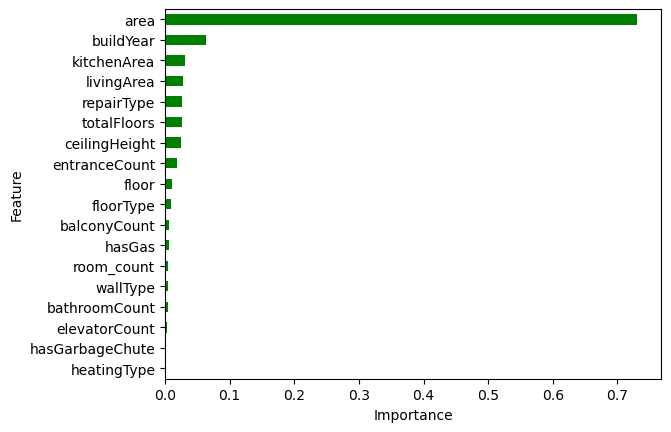

In [463]:
global_importances_cian = pd.Series(rf_regressor_combined.feature_importances_, index = combined_imputation.drop(columns=combined_imputation.columns[0]).columns)
global_importances_cian.sort_values(ascending=True, inplace=True)
global_importances_cian.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")

In [464]:
X_combined = combined_imputation.drop(['price', 'area'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [465]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2565766707080.664
MAE:  858450.8530693083
RMSE:  1601801.082244816
R2:  0.8095471326532315


In [466]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2697212717901.928
MAE:  855396.6135773917
RMSE:  1642319.3105793796
R2:  0.7997900999529794


Text(0, 0.5, 'Feature')

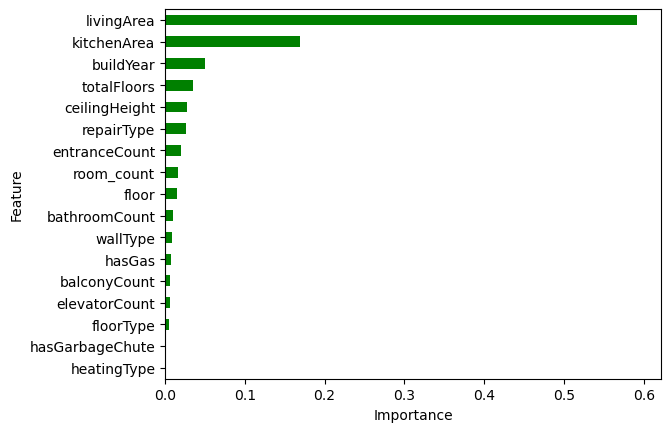

In [478]:
global_importances_cian = pd.Series(rf_regressor_combined.feature_importances_, index = combined_imputation.drop(['area'], axis=1).drop(columns=combined_imputation.columns[0]).columns)
global_importances_cian.sort_values(ascending=True, inplace=True)
global_importances_cian.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")

In [479]:
X_combined = combined_imputation.drop(['price', 'area', 'livingArea', 'kitchenArea'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

Random Forest Before: 
MSE:  1898149586319.0215
MAE:  727558.4663577748
RMSE:  1377733.496115639
R2:  0.8601224522714643

XGBoost Before:
MSE:  1857671475586.7507
MAE:  746359.1422064777
RMSE:  1362964.2238836465
R2:  0.8631053461944318

In [480]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  3510278903137.9067
MAE:  1018232.8777638818
RMSE:  1873573.8317818989
R2:  0.7394374631003948


In [481]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  4301951939576.8896
MAE:  1049735.2052685018
RMSE:  2074114.736357873
R2:  0.6806728063703678


Text(0, 0.5, 'Feature')

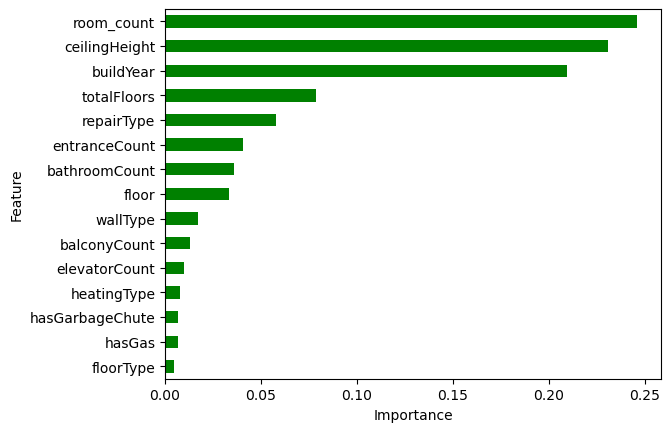

In [482]:
global_importances_cian = pd.Series(rf_regressor_combined.feature_importances_, index = combined_imputation.drop(['area', 'livingArea', 'kitchenArea'], axis=1).drop(columns=combined_imputation.columns[0]).columns)
global_importances_cian.sort_values(ascending=True, inplace=True)
global_importances_cian.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")

In [485]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [486]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1870355244216.2754
MAE:  758284.4464582258
RMSE:  1367609.3170991032
R2:  0.8611664426718839


In [487]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1862432292984.8872
MAE:  760413.281193592
RMSE:  1364709.600239145
R2:  0.8617545510044545


In [488]:
print(rf_regressor_combined.feature_importances_)

[0.00454869 0.01033598 0.02606223 0.73979063 0.02736864 0.02191532
 0.02444295 0.00493926 0.00415139 0.02122686 0.06542857 0.00721679
 0.00506743 0.0250344  0.00092423 0.0086469  0.00289975]


In [489]:
X_combined = combined_imputation.drop(['price', 'hasGas'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [490]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1853255019059.2595
MAE:  749756.1686599622
RMSE:  1361343.0938081918
R2:  0.8624357657574323


In [491]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1900347413769.599
MAE:  764485.2885266246
RMSE:  1378530.8896682726
R2:  0.8589401706286707


In [492]:
print(rf_regressor_combined.feature_importances_)

[0.00477121 0.01174925 0.02638295 0.74009705 0.02932619 0.02163988
 0.02626988 0.00479241 0.00428216 0.02828829 0.06474438 0.00149236
 0.00881235 0.00440574 0.01867894 0.00104058 0.00322638]


In [493]:
X_combined = combined_imputation.drop(['price', 'balconyCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [494]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2125245103784.3357
MAE:  761598.1197145579
RMSE:  1457822.0411917004
R2:  0.8422463653014879


In [495]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2020610875552.6772
MAE:  780951.7018840252
RMSE:  1421481.9293795743
R2:  0.8500132011304591


In [496]:
print(rf_regressor_combined.feature_importances_)

[0.00468262 0.01109711 0.02670719 0.74747731 0.03279333 0.01926238
 0.02396093 0.00536893 0.02440733 0.05950831 0.00109312 0.00589213
 0.00916268 0.01322065 0.00099652 0.0110952  0.00327425]


In [497]:
X_combined = combined_imputation.drop(['price', 'bathroomCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [498]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1941697391571.91
MAE:  755803.1429166667
RMSE:  1393448.022558398
R2:  0.8558708261651065


In [499]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1943503069779.9763
MAE:  761880.7332186372
RMSE:  1394095.7893129068
R2:  0.855736793483459


In [500]:
print(rf_regressor_combined.feature_importances_)

[0.0051573  0.01028276 0.02569442 0.74363714 0.03395375 0.02020733
 0.02135204 0.00535619 0.02081618 0.06044772 0.00125677 0.00649405
 0.00964048 0.02300155 0.00093308 0.00870073 0.0030685 ]


In [501]:
X_combined = combined_imputation.drop(['price', 'elevatorCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [502]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1924238913567.852
MAE:  752350.1205343533
RMSE:  1387169.3889240248
R2:  0.8571667418016323


In [503]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2010427844551.634
MAE:  771940.8069720217
RMSE:  1417895.5689865295
R2:  0.8507690716650161


In [504]:
print(rf_regressor_combined.feature_importances_)

[0.00512684 0.01073627 0.02502256 0.73443939 0.03009355 0.02055592
 0.02436232 0.00452647 0.00467402 0.02458273 0.06712479 0.00263544
 0.00548175 0.0102616  0.02001215 0.00095505 0.00940915]


In [505]:
X_combined = combined_imputation.drop(['price', 'wallType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [506]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1902811954661.7307
MAE:  757150.4312363905
RMSE:  1379424.501254683
R2:  0.8587572315959423


In [507]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1849280265699.2559
MAE:  767138.162060018
RMSE:  1359882.4455441933
R2:  0.862730805510002


In [508]:
print(rf_regressor_combined.feature_importances_)

[0.00441847 0.01075711 0.02630117 0.74187967 0.0318198  0.02127006
 0.02780935 0.00441863 0.00557723 0.0209363  0.06318126 0.00127917
 0.00816358 0.01863871 0.000949   0.00969682 0.00290367]


In [509]:
X_combined = combined_imputation.drop(['price', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [510]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1811502765448.9846
MAE:  747472.532505229
RMSE:  1345920.7872118568
R2:  0.8655349705278121


In [511]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1934744964122.6128
MAE:  770921.6448837996
RMSE:  1390951.1005504876
R2:  0.8563868940285972


In [512]:
print(rf_regressor_combined.feature_importances_)

[0.00485952 0.01086418 0.02635299 0.74606499 0.03075991 0.02171428
 0.0227364  0.00439749 0.00637749 0.0263756  0.06223174 0.00126881
 0.00424851 0.01816243 0.00085535 0.00923004 0.00350028]


In [513]:
X_combined = combined_imputation.drop(['price', 'kitchenArea'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [514]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1760001186725.983
MAE:  751536.7813058707
RMSE:  1326650.363406268
R2:  0.8693578525200106


In [515]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1702706872241.867
MAE:  744448.75191787
RMSE:  1304878.106277313
R2:  0.8736107202675164


In [516]:
print(rf_regressor_combined.feature_importances_)

[0.0050861  0.01181761 0.0279944  0.74725719 0.02540241 0.02394436
 0.00986344 0.00707271 0.02377774 0.06739131 0.00129426 0.00902189
 0.00348118 0.02274498 0.00124097 0.00941949 0.00318996]


In [517]:
X_combined = combined_imputation.drop(['price', 'livingArea'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [518]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1957678916235.2075
MAE:  754299.1025365309
RMSE:  1399170.7959485173
R2:  0.8546845424752065


In [519]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1804265610638.0508
MAE:  770628.8044336643
RMSE:  1343229.5450287159
R2:  0.8660721732599901


In [520]:
print(rf_regressor_combined.feature_importances_)

[0.00523281 0.01133418 0.02704947 0.74754638 0.03042082 0.02642947
 0.00595708 0.00591962 0.02350132 0.06346056 0.00247894 0.00624716
 0.006288   0.0245821  0.00114452 0.00821821 0.00418936]


In [521]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [522]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1882379711195.6038
MAE:  748660.9103373733
RMSE:  1371998.4370237468
R2:  0.8602738852120767


In [523]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1941824926625.449
MAE:  769150.0759250902
RMSE:  1393493.784207683
R2:  0.8558613594366753


In [524]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'bathroomCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [525]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2026406785806.5774
MAE:  754661.3629394447
RMSE:  1423519.1554055666
R2:  0.8495829797374955


In [526]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2033013274023.6597
MAE:  781136.9241313176
RMSE:  1425837.7446342413
R2:  0.8490925904045279


In [527]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'hasGas', 'bathroomCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [528]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2032756929545.7095
MAE:  753523.0976031459
RMSE:  1425747.849216582
R2:  0.8491116184559557


In [529]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1874361841910.6562
MAE:  762849.8103564982
RMSE:  1369073.351544999
R2:  0.8608690391639602


In [530]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [531]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1850631725101.5247
MAE:  734969.2214055785
RMSE:  1360379.2578180265
R2:  0.8626304887830157


In [532]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2081201354156.6873
MAE:  772365.7954083935
RMSE:  1442636.944680361
R2:  0.8455156642530021


In [533]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 'entranceCount'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [534]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1865856999845.6501
MAE:  744097.3459583977
RMSE:  1365963.7622739668
R2:  0.8615003403470107


In [535]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2086771515872.6665
MAE:  779176.3774255415
RMSE:  1444566.2033540264
R2:  0.8451021998224808


In [536]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [537]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1886956530108.024
MAE:  745697.9496823965
RMSE:  1373665.363219159
R2:  0.859934155071066


In [538]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2007182587649.7563
MAE:  774988.5729354693
RMSE:  1416750.714716515
R2:  0.851009962031445


In [539]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [540]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1852665150166.0994
MAE:  739910.7584652741
RMSE:  1361126.4269589726
R2:  0.8624795508068489


In [541]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  2049531977422.666
MAE:  779603.7832806859
RMSE:  1431618.6564244914
R2:  0.8478664327735517


In [542]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType', 'kitchenArea'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [543]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1811391036861.9895
MAE:  748460.6790716865
RMSE:  1345879.2801964036
R2:  0.8655432639668451


In [544]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1870123031164.7722
MAE:  760697.8123307761
RMSE:  1367524.4170269035
R2:  0.8611836794851031


In [545]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType', 'kitchenArea', 'livingArea'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [546]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1690258557553.0398
MAE:  733404.2374608906
RMSE:  1300099.4414094023
R2:  0.8745347392827991


In [547]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  1983521377831.627
MAE:  766705.4992949007
RMSE:  1408375.4392318928
R2:  0.852766296791858
